In [1]:
#pip install xgboost 

- [Introduction](#intro)
- [Data Assessment and Cleaning](#da)
- [Exploratory Data Analysis](#eda)
- [Conclusion](#conc)
- [Recommendations](#rec)
- [Limitations](#lit)
- [References](#ref)

# Introduction
<a name="intro"></a>

- In this project, we aim to predict school completion rates of emerging countries using data analysis and machine learning methods.
- We will explore the data, explain in detail, and give answers to the research questions below
- > Which of the models gave a smaller predictive error
- > What is the impact of feature engineering and feature selection on the performance of the model
- > What is the impact of different hyper-parameters on the model performance

**Proportion of children/young people at the age of primary education prepared for the future in mathematics, both sexes (%): PCYPEPFM**  
**Proportion of children/young people at the age of lower secondary education prepared for the future in mathematics, both sexes (%): PCYPESFM**  
**Proportion of children/young people at the age of lower secondary education prepared for the future in reading, both sexes (%): PCYPELSFR**  
**Proportion of students at the end of primary education achieving at least a minimum proficiency level in reading, both sexes (%): PSPMPRBS**  
**Proportion of students at the end of lower secondary education achieving at least a minimum proficiency level in reading, both sexes (%): PSPMLSRBS**  
**Completion rate, primary education, not disabled, both sexes (%): CRPND**  
**Completion rate, primary education, disabled, both sexes (%): CRPD**  
**Completion rate, lower secondary education, not disabled, both sexes (%): CRLSND**  
**Completion rate, lower secondary education, disabled, both sexes (%): CRLSD**  
**Completion rate, upper secondary education, not disabled, both sexes (%): CRUSND**  
**Completion rate, upper secondary education, disabled, both sexes (%): CRUSD**  
**Gross intake ratio to the last grade of primary education, both sexes (%): GIP**  
**Gross intake ratio to the last grade of lower secondary general education, both sexes (%): GILS**  
**Out-of-school rate for children of primary school age, both sexes (%): OFSPSA**  
**Out-of-school rate for adolescents of lower secondary school age, both sexes (%): OFSALSSA**  
**Out-of-school rate for youth of upper secondary school age, both sexes (%): OFSUSSA**  
**Percentage of pupils enrolled in primary education who are at least 2 years over-age for their current grade, both sexes (%): PPP_2_CG**  
**Percentage of pupils enrolled in lower secondary education who are at least 2 years over-age for their current grade, both sexes (household survey data) (%): PPELS_2_CG**  
**Proportion of children aged 24-59 months who are developmentally on track in health, learning and psychosocial well-being, both sexes (%): PC_24_59_THLP**  
**Net enrolment rate, early childhood education, both sexes (%): NERECE**  
**Net enrolment rate, pre-primary, both sexes (%): NERPP**  
**Percentage of youth/adults who have achieved at least a minimum level of proficiency in digital literacy skills (%): PYALMLPDL**  
**Educational attainment rate, completed primary education or higher, population 25+ years, both sexes (%): EARCPEHP_25+**  
**Educational attainment rate, completed lower secondary education or higher, population 25+ years, both sexes (%): EARCLSHP_25+**  
**Educational attainment rate, completed upper secondary education or higher, population 25+ years, both sexes (%): EARCUSE_25+**  
**Number of attacks on students, personnel and institutions: NASPI**  
**Percentage of students experiencing bullying in the last 12 months in lower secondary education, adjusted gender parity index (GPIA): PSEB_12LSE**  
**Proportion of teachers with the minimum required qualifications in primary education, adjusted gender parity index (GPIA): PTMREPEAGPI**  
**Proportion of teachers with the minimum required qualifications in secondary education, adjusted gender parity index (GPIA): PTWMRSEAGPI**  


# Data assesment and Cleaning
<a id='da'></a>


In [7]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# To ensure the output of multiple lines of code cell is displayed in Jupyter notebbok:
# To activate this option per notebook basis, use the code below:

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# or
#from google.colab import drive
#drive.mount('/content/drive')

get_ipython().ast_node_interactivity = 'all'

In [9]:
#C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project/
path = 'C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project/*.csv'
#path = "C:/Users/Odunayo Grace/Downloads/Project data"
# Specifying the path to csv file
csv_files_list = glob.glob(path)

print(f"\nThe total number of csv files in the directory is: {len(csv_files_list)}.\n\n"
     "The list of the files include:- \n")
print(csv_files_list)


The total number of csv files in the directory is: 30.

The list of the files include:- 

['C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\\SDG_Feb2024_ (10).csv', 'C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\\SDG_Feb2024_ (11).csv', 'C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\\SDG_Feb2024_ (12).csv', 'C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\\SDG_Feb2024_ (13).csv', 'C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\\SDG_Feb2024_ (14).csv', 'C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\\SDG_Feb2024_ (15).csv', 'C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\\SDG_Feb2024_ (16).csv', 'C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Proje

In [10]:
# Create an empty list to store DataFrames
df_list = []

# loop through list of csv files and read each one into a dataframe and append to the df_list
for csv_file in csv_files_list:
    # read in csv
    temp_df = pd.read_csv(csv_file)

    # Cehckout the created DataFrame
    temp_df.head()

    # append each temp_df to the df_list
    df_list.append(temp_df)

    # Print a message to show the success of the operations above and
    # shape of each of the newly created temp_df
    print(f"\nSuccessfully created dataframe for {csv_file} with shape {temp_df.shape}\n")

    # print out the names of the columns in each DataFrame in temp_df
    print(temp_df.columns)

# Check the length of the DataFrames in the df_list
print(f"\nThe DataFrame list, df_list contains {len(df_list)} DataFrames "
f"with their corresponding shapes shown above\n")

,Country,Year,PSPMLSRBS
0,Albania,2012,47.66
1,Albania,2015,49.72
2,Albania,2018,47.76
3,Albania,2022,26.29
4,Algeria,2015,21.03



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (10).csv with shape (285, 3)

Index(['Country', 'Year', 'PSPMLSRBS'], dtype='object')


,Country,Year,CRPND
0,Bangladesh,2011,76.00
1,Botswana,2011,93.43
2,Cambodia,2014,72.50
3,Cambodia,2021,83.01
4,Colombia,2010,91.10



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (11).csv with shape (23, 3)

Index(['Country', 'Year', 'CRPND'], dtype='object')


,Country,Year,CRPD
0,Bangladesh,2011,34.41
1,Botswana,2011,82.22
2,Cambodia,2014,44.30
3,Cambodia,2021,37.13
4,Colombia,2010,63.30



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (12).csv with shape (23, 3)

Index(['Country', 'Year', ' CRPD'], dtype='object')


,Country,Year,CRLSND
0,Bangladesh,2011,54.04
1,Botswana,2011,83.78
2,Cambodia,2014,40.80
3,Cambodia,2021,56.44
4,Colombia,2010,73.10



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (13).csv with shape (23, 3)

Index(['Country', 'Year', 'CRLSND'], dtype='object')


,Country,Year,CRLSD
0,Bangladesh,2011,21.32
1,Botswana,2011,70.35
2,Cambodia,2014,3.90
3,Cambodia,2021,13.52
4,Colombia,2010,46.90



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (14).csv with shape (23, 3)

Index(['Country', 'Year', ' CRLSD'], dtype='object')


,Country,Year,CRUSND
0,Bangladesh,2011,13.31
1,Botswana,2011,54.08
2,Cambodia,2021,26.81
3,Dominican Republic,2010,49.43
4,Maldives,2017,40.75



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (15).csv with shape (19, 3)

Index(['Country', 'Year', 'CRUSND'], dtype='object')


,Country,Year,CRUSD
0,Dominican Republic,2010,44.51
1,Zambia,2010,10.69
2,Philippines,2010,45.46
3,Puerto Rico,2010,64.59
4,Nepal,2011,10.59



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (16).csv with shape (19, 3)

Index(['Country', 'Year', 'CRUSD'], dtype='object')


,Country,Year,GIP
0,Afghanistan,2016,82.91
1,Afghanistan,2017,87.25
2,Afghanistan,2018,88.74
3,Afghanistan,2019,86.18
4,Albania,2010,103.27



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (17).csv with shape (1780, 3)

Index(['Country', 'Year', 'GIP'], dtype='object')


,Country,Year,GIlS
0,Afghanistan,2016,52.52
1,Afghanistan,2017,54.69
2,Afghanistan,2018,56.74
3,Afghanistan,2019,59.72
4,Albania,2010,99.68



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (18).csv with shape (1739, 3)

Index(['Country', 'Year', ' GIlS'], dtype='object')


,Country,Year,OFSPSA
0,Albania,2010,0.12
1,Albania,2011,0.17
2,Albania,2012,0.22
3,Albania,2013,0.37
4,Albania,2016,1.15



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (19).csv with shape (1811, 3)

Index(['Country', 'Year', ' OFSPSA'], dtype='object')


,Country,Year,OFSALSSA
0,Albania,2013,1.20
1,Albania,2014,1.38
2,Albania,2015,0.97
3,Albania,2016,1.38
4,Albania,2017,1.40



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (20).csv with shape (1554, 3)

Index(['Country', 'Year', 'OFSALSSA'], dtype='object')


,Country,Year,OFSUSSA
0,Afghanistan,2013,51.55
1,Afghanistan,2014,54.37
2,Afghanistan,2015,55.46
3,Afghanistan,2016,57.68
4,Afghanistan,2017,56.16



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (21).csv with shape (1617, 3)

Index(['Country', 'Year', 'OFSUSSA'], dtype='object')


,Country,Year,PPP_2_CG
0,Albania,2010,2.94
1,Albania,2011,2.70
2,Albania,2012,2.44
3,Albania,2013,2.68
4,Albania,2014,2.26



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (22).csv with shape (1708, 3)

Index(['Country', 'Year', 'PPP_2_CG'], dtype='object')


,Country,Year,PPELS_2_CG
0,Afghanistan,2015,15.94
1,Afghanistan,2022,22.94
2,Albania,2017,1.22
3,Algeria,2019,20.38
4,Angola,2015,62.22



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (23).csv with shape (283, 3)

Index(['Country', 'Year', 'PPELS_2_CG'], dtype='object')


,Country,Year,PC_24_59_THLP
0,Algeria,2019,76.80
1,Argentina,2020,86.22
2,Bangladesh,2019,74.50
3,Barbados,2012,96.60
4,Belarus,2019,86.90



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (24).csv with shape (85, 3)

Index(['Country', 'Year', 'PC_24_59_THLP'], dtype='object')


,Country,Year,NERECE
0,Algeria,2010,70.01
1,Algeria,2011,66.70
2,Algeria,2021,50.65
3,Algeria,2022,53.19
4,Algeria,2023,52.43



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (25).csv with shape (1461, 3)

Index(['Country', 'Year', 'NERECE'], dtype='object')


,Country,Year,NERPP
0,Albania,2010,66.20
1,Albania,2011,70.17
2,Albania,2012,75.41
3,Albania,2013,77.26
4,Albania,2014,76.65



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (26).csv with shape (1684, 3)

Index(['Country', 'Year', ' NERPP'], dtype='object')


,Country,Year,PYALMLPDL
0,Austria,2012,32
1,Belgium,2012,35
2,Canada,2012,37
3,Chile,2015,15
4,Czechia,2012,33



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (27).csv with shape (31, 3)

Index(['Country', 'Year', 'PYALMLPDL'], dtype='object')


,Country,Year,EARCPEHP_25+
0,Afghanistan,2014,13.68
1,Afghanistan,2015,19.59
2,Afghanistan,2017,24.28
3,Afghanistan,2020,22.43
4,Afghanistan,2021,15.25



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (28).csv with shape (1299, 3)

Index(['Country', 'Year', 'EARCPEHP_25+'], dtype='object')


,Country,Year,EARCLSHP_25+
0,Afghanistan,2014,10.99
1,Afghanistan,2015,13.13
2,Afghanistan,2017,16.00
3,Afghanistan,2020,16.78
4,Afghanistan,2021,11.63



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (29).csv with shape (1326, 3)

Index(['Country', 'Year', 'EARCLSHP_25+'], dtype='object')


,Country,Year,EARCUSE_25+
0,Kenya,2010,22.03
1,Slovakia,2010,84.25
2,Georgia,2010,52.02
3,Russian Federation,2010,84.99
4,Portugal,2010,25.60



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (30).csv with shape (1327, 3)

Index(['Country', 'Year', 'EARCUSE_25+'], dtype='object')


,Country,Year,NASPI
0,Afghanistan,2013,199
1,Afghanistan,2014,229
2,Afghanistan,2015,314
3,Afghanistan,2016,143
4,Afghanistan,2017,115



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (31).csv with shape (837, 3)

Index(['Country', 'Year', 'NASPI'], dtype='object')


,Country,Year,PSEB_12LSE
0,Afghanistan,2014,1.06
1,Albania,2014,0.77
2,Algeria,2011,1.13
3,Anguilla,2016,1.26
4,Argentina,2012,0.98



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (33).csv with shape (103, 3)

Index(['Country', 'Year', 'PSEB_12LSE'], dtype='object')


,Country,Year,PTMREPEAGPI
0,Albania,2021,0.83
1,Algeria,2014,1.00
2,Algeria,2015,1.00
3,Algeria,2021,1.00
4,Algeria,2022,1.01



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (34).csv with shape (1057, 3)

Index(['Country', 'Year', 'PTMREPEAGPI'], dtype='object')


,Country,Year,PTWMRSEAGPI
0,Albania,2020,0.91
1,Albania,2021,0.91
2,Andorra,2013,1.00
3,Andorra,2014,1.00
4,Andorra,2015,1.00



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (35).csv with shape (772, 3)

Index(['Country', 'Year', 'PTWMRSEAGPI'], dtype='object')


,Country,Year,GEEDUV
0,Afghanistan,2010,3.48
1,Afghanistan,2011,3.46
2,Afghanistan,2012,2.60
3,Afghanistan,2013,3.45
4,Afghanistan,2014,3.70



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (5).csv with shape (2093, 3)

Index(['Country', 'Year', 'GEEDUV'], dtype='object')


,Country,Year,PCYPEPFM
0,Albania,2019,60.05
1,Argentina,2013,19.83
2,Argentina,2019,12.61
3,Armenia,2011,40.67
4,Armenia,2015,54.25



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (6).csv with shape (176, 3)

Index(['Country', 'Year', 'PCYPEPFM'], dtype='object')


,Country,Year,PCYPESFM
0,Iran (Islamic Republic of),2011,20.88
1,Kazakhstan,2012,54.50
2,Iran (Islamic Republic of),2015,29.01
3,Kazakhstan,2018,50.81
4,Uzbekistan,2022,19.01



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (7).csv with shape (241, 3)

Index(['Country', 'Year', 'PCYPESFM'], dtype='object')


,Country,Year,PCYPELSFR
0,Albania,2012,45.77
1,Albania,2015,47.86
2,Albania,2018,46.07
3,Albania,2022,25.43
4,Algeria,2015,13.01



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (8).csv with shape (233, 3)

Index(['Country', 'Year', 'PCYPELSFR'], dtype='object')


,Country,Year,PSPMPRBS
0,Albania,2021,92.12
1,Argentina,2013,32.50
2,Argentina,2019,31.90
3,Austria,2011,97.10
4,Austria,2016,97.59



Successfully created dataframe for C:/Users/512GB/OneDrive/Documents/Hamoye/Project_1/Spring project/Hamoye_Spring_24_Project\SDG_Feb2024_ (9).csv with shape (206, 3)

Index(['Country', 'Year', 'PSPMPRBS'], dtype='object')

The DataFrame list, df_list contains 30 DataFrames with their corresponding shapes shown above



In [11]:
# concatenate our list of dataframes, df_list, into one single DataFrame, df_total
df_total = pd.concat(df_list, axis=1)

# Check the shape of the concatenated DataFrame, df_total
print(f"\nThe final concatenated DataFrame, df_total, contains {df_total.shape[0]} observations "
      f"and {df_total.shape[1]} features\n")

# Check the first five observations
df_total.head()


The final concatenated DataFrame, df_total, contains 2093 observations and 90 features



,Country,Year,PSPMLSRBS,Country,Year,CRPND,Country,Year,CRPD,Country,...,PCYPEPFM,Country,Year,PCYPESFM,Country,Year,PCYPELSFR,Country,Year,PSPMPRBS
0,Albania,2012.0,47.66,Bangladesh,2011.0,76.00,Bangladesh,2011.0,34.41,Bangladesh,...,60.05,Iran (Islamic Republic of),2011.0,20.88,Albania,2012.0,45.77,Albania,2021.0,92.12
1,Albania,2015.0,49.72,Botswana,2011.0,93.43,Botswana,2011.0,82.22,Botswana,...,19.83,Kazakhstan,2012.0,54.50,Albania,2015.0,47.86,Argentina,2013.0,32.50
2,Albania,2018.0,47.76,Cambodia,2014.0,72.50,Cambodia,2014.0,44.30,Cambodia,...,12.61,Iran (Islamic Republic of),2015.0,29.01,Albania,2018.0,46.07,Argentina,2019.0,31.90
3,Albania,2022.0,26.29,Cambodia,2021.0,83.01,Cambodia,2021.0,37.13,Cambodia,...,40.67,Kazakhstan,2018.0,50.81,Albania,2022.0,25.43,Austria,2011.0,97.10
4,Algeria,2015.0,21.03,Colombia,2010.0,91.10,Colombia,2010.0,63.30,Colombia,...,54.25,Uzbekistan,2022.0,19.01,Algeria,2015.0,13.01,Austria,2016.0,97.59


In [12]:
# Check the information about the datatypes in the DatFrame
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 90 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        285 non-null    object 
 1   Year           285 non-null    float64
 2   PSPMLSRBS      285 non-null    float64
 3   Country        23 non-null     object 
 4   Year           23 non-null     float64
 5   CRPND          23 non-null     float64
 6   Country        23 non-null     object 
 7   Year           23 non-null     float64
 8    CRPD          23 non-null     float64
 9   Country        23 non-null     object 
 10  Year           23 non-null     float64
 11  CRLSND         23 non-null     float64
 12  Country        23 non-null     object 
 13  Year           23 non-null     float64
 14   CRLSD         23 non-null     float64
 15  Country        19 non-null     object 
 16  Year           19 non-null     float64
 17  CRUSND         19 non-null     float64
 18  Country 

From the output of the `df_total.info()` command above, we will notice that there are inconsistencies in the column names, with some have trailing spaces and the column names have a mixture of cases- upper, lower and sentence cases.

We shall attempt to correct ths and make all column names uniformly lowercase.
However, we first need to convert the datatype of the column names from `object` to `string`.

When NA values are present, the output dtype is `float64`. Similarly for methods returning boolean values.

In [13]:
# Convert column names from object to string datatype so we can run string operations on them
df_total.columns = df_total.columns.astype('string')
df_total.columns

Index(['Country', 'Year', 'PSPMLSRBS', 'Country', 'Year', 'CRPND', 'Country',
       'Year', ' CRPD', 'Country', 'Year', 'CRLSND', 'Country', 'Year',
       ' CRLSD', 'Country', 'Year', 'CRUSND', 'Country', 'Year', 'CRUSD',
       'Country', 'Year', 'GIP', 'Country', 'Year', ' GIlS', 'Country', 'Year',
       ' OFSPSA', 'Country', 'Year', 'OFSALSSA', 'Country', 'Year', 'OFSUSSA',
       'Country', 'Year', 'PPP_2_CG', 'Country', 'Year', 'PPELS_2_CG',
       'Country', 'Year', 'PC_24_59_THLP', 'Country', 'Year', 'NERECE',
       'Country', 'Year', ' NERPP', 'Country', 'Year', 'PYALMLPDL', 'Country',
       'Year', 'EARCPEHP_25+', 'Country', 'Year', 'EARCLSHP_25+', 'Country',
       'Year', 'EARCUSE_25+', 'Country', 'Year', 'NASPI', 'Country', 'Year',
       'PSEB_12LSE', 'Country', 'Year', 'PTMREPEAGPI', 'Country', 'Year',
       'PTWMRSEAGPI', 'Country', 'Year', 'GEEDUV', 'Country', 'Year',
       'PCYPEPFM', 'Country', 'Year', 'PCYPESFM', 'Country', 'Year',
       'PCYPELSFR', 'Country

There are two ways to store text data in pandas:

1. `object` -dtype NumPy array.
    
2. [`StringDtype`](https://pandas.pydata.org/docs/reference/api/pandas.StringDtype.html#pandas.StringDtype "pandas.StringDtype") extension type.
    

We recommend using [`StringDtype`](https://pandas.pydata.org/docs/reference/api/pandas.StringDtype.html#pandas.StringDtype "pandas.StringDtype") to store text data.

Prior to pandas 1.0, `object` dtype was the only option. This was unfortunate for many reasons:

1. You can accidentally store a _mixture_ of strings and non-strings in an `object` dtype array. It’s better to have a dedicated dtype.
    
2. `object` dtype breaks dtype-specific operations like [`DataFrame.select_dtypes()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes "pandas.DataFrame.select_dtypes"). There isn’t a clear way to select _just_ text while excluding non-text but still object-dtype columns.
    
3. When reading code, the contents of an `object` dtype array is less clear than `'string'`.

In [14]:
# Remove trailing spaces in column names and
# Convert column names to lowercase for uniformity
df_total.columns = df_total.columns.str.strip().str.lower()

# Check to see if we are successful
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 90 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        285 non-null    object 
 1   year           285 non-null    float64
 2   pspmlsrbs      285 non-null    float64
 3   country        23 non-null     object 
 4   year           23 non-null     float64
 5   crpnd          23 non-null     float64
 6   country        23 non-null     object 
 7   year           23 non-null     float64
 8   crpd           23 non-null     float64
 9   country        23 non-null     object 
 10  year           23 non-null     float64
 11  crlsnd         23 non-null     float64
 12  country        23 non-null     object 
 13  year           23 non-null     float64
 14  crlsd          23 non-null     float64
 15  country        19 non-null     object 
 16  year           19 non-null     float64
 17  crusnd         19 non-null     float64
 18  country 

In [15]:
# Check the DataFrame for the number and types of datatypes it contains
df_total.dtypes.nunique()
df_total.dtypes.unique()

3

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [16]:
# Separate the columns based on datatypes

# For the numerical columns
numerical_cols_df = df_total.select_dtypes('number')
numerical_cols_df.info()
print("#########" * 20)
# For the categorical columns
categorical_cols_df = df_total.select_dtypes('object')
categorical_cols_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           285 non-null    float64
 1   pspmlsrbs      285 non-null    float64
 2   year           23 non-null     float64
 3   crpnd          23 non-null     float64
 4   year           23 non-null     float64
 5   crpd           23 non-null     float64
 6   year           23 non-null     float64
 7   crlsnd         23 non-null     float64
 8   year           23 non-null     float64
 9   crlsd          23 non-null     float64
 10  year           19 non-null     float64
 11  crusnd         19 non-null     float64
 12  year           19 non-null     float64
 13  crusd          19 non-null     float64
 14  year           1780 non-null   float64
 15  gip            1780 non-null   float64
 16  year           1739 non-null   float64
 17  gils           1739 non-null   float64
 18  year    

In [17]:
df_total['country']

,country,country,country,country,country,country,country,country,country,country,...,country,country,country,country,country,country,country,country,country,country
0,Albania,Bangladesh,Bangladesh,Bangladesh,Bangladesh,Bangladesh,Dominican Republic,Afghanistan,Afghanistan,Albania,...,Kenya,Afghanistan,Afghanistan,Albania,Albania,Afghanistan,Albania,Iran (Islamic Republic of),Albania,Albania
1,Albania,Botswana,Botswana,Botswana,Botswana,Botswana,Zambia,Afghanistan,Afghanistan,Albania,...,Slovakia,Afghanistan,Albania,Algeria,Albania,Afghanistan,Argentina,Kazakhstan,Albania,Argentina
2,Albania,Cambodia,Cambodia,Cambodia,Cambodia,Cambodia,Philippines,Afghanistan,Afghanistan,Albania,...,Georgia,Afghanistan,Algeria,Algeria,Andorra,Afghanistan,Argentina,Iran (Islamic Republic of),Albania,Argentina
3,Albania,Cambodia,Cambodia,Cambodia,Cambodia,Dominican Republic,Puerto Rico,Afghanistan,Afghanistan,Albania,...,Russian Federation,Afghanistan,Anguilla,Algeria,Andorra,Afghanistan,Armenia,Kazakhstan,Albania,Austria
4,Algeria,Colombia,Colombia,Colombia,Colombia,Maldives,Nepal,Albania,Albania,Albania,...,Portugal,Afghanistan,Argentina,Algeria,Andorra,Afghanistan,Armenia,Uzbekistan,Algeria,Austria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Zimbabwe,NaN,NaN,NaN,NaN
2089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Zimbabwe,NaN,NaN,NaN,NaN
2090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Zimbabwe,NaN,NaN,NaN,NaN
2091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Zimbabwe,NaN,NaN,NaN,NaN


From the output of the code cell above, it is obvious that the DataFrame contains multiple `country` columns. In addition, it is the only categorical column in our DataFrame.

In [18]:
numerical_cols_df.head()
categorical_cols_df.head()

,year,pspmlsrbs,year,crpnd,year,crpd,year,crlsnd,year,crlsd,...,year,geeduv,year,pcypepfm,year,pcypesfm,year,pcypelsfr,year,pspmprbs
0,2012.0,47.66,2011.0,76.00,2011.0,34.41,2011.0,54.04,2011.0,21.32,...,2010,3.48,2019.0,60.05,2011.0,20.88,2012.0,45.77,2021.0,92.12
1,2015.0,49.72,2011.0,93.43,2011.0,82.22,2011.0,83.78,2011.0,70.35,...,2011,3.46,2013.0,19.83,2012.0,54.50,2015.0,47.86,2013.0,32.50
2,2018.0,47.76,2014.0,72.50,2014.0,44.30,2014.0,40.80,2014.0,3.90,...,2012,2.60,2019.0,12.61,2015.0,29.01,2018.0,46.07,2019.0,31.90
3,2022.0,26.29,2021.0,83.01,2021.0,37.13,2021.0,56.44,2021.0,13.52,...,2013,3.45,2011.0,40.67,2018.0,50.81,2022.0,25.43,2011.0,97.10
4,2015.0,21.03,2010.0,91.10,2010.0,63.30,2010.0,73.10,2010.0,46.90,...,2014,3.70,2015.0,54.25,2022.0,19.01,2015.0,13.01,2016.0,97.59


,country,country,country,country,country,country,country,country,country,country,...,country,country,country,country,country,country,country,country,country,country
0,Albania,Bangladesh,Bangladesh,Bangladesh,Bangladesh,Bangladesh,Dominican Republic,Afghanistan,Afghanistan,Albania,...,Kenya,Afghanistan,Afghanistan,Albania,Albania,Afghanistan,Albania,Iran (Islamic Republic of),Albania,Albania
1,Albania,Botswana,Botswana,Botswana,Botswana,Botswana,Zambia,Afghanistan,Afghanistan,Albania,...,Slovakia,Afghanistan,Albania,Algeria,Albania,Afghanistan,Argentina,Kazakhstan,Albania,Argentina
2,Albania,Cambodia,Cambodia,Cambodia,Cambodia,Cambodia,Philippines,Afghanistan,Afghanistan,Albania,...,Georgia,Afghanistan,Algeria,Algeria,Andorra,Afghanistan,Argentina,Iran (Islamic Republic of),Albania,Argentina
3,Albania,Cambodia,Cambodia,Cambodia,Cambodia,Dominican Republic,Puerto Rico,Afghanistan,Afghanistan,Albania,...,Russian Federation,Afghanistan,Anguilla,Algeria,Andorra,Afghanistan,Armenia,Kazakhstan,Albania,Austria
4,Algeria,Colombia,Colombia,Colombia,Colombia,Maldives,Nepal,Albania,Albania,Albania,...,Portugal,Afghanistan,Argentina,Algeria,Andorra,Afghanistan,Armenia,Uzbekistan,Algeria,Austria


In [19]:
# Check for missing values in the numerical columns dataframe
numerical_cols_df.isnull().sum()

year             1808
pspmlsrbs        1808
year             2070
crpnd            2070
year             2070
crpd             2070
year             2070
crlsnd           2070
year             2070
crlsd            2070
year             2074
crusnd           2074
year             2074
crusd            2074
year              313
gip               313
year              354
gils              354
year              282
ofspsa            282
year              539
ofsalssa          539
year              476
ofsussa           476
year              385
ppp_2_cg          385
year             1810
ppels_2_cg       1810
year             2008
pc_24_59_thlp    2008
year              632
nerece            632
year              409
nerpp             409
year             2062
pyalmlpdl        2062
year              794
earcpehp_25+      794
year              767
earclshp_25+      767
year              766
earcuse_25+       766
year             1256
naspi            1256
year             1990
pseb_12lse

In [20]:
# Check for missing values in the categorical columns dataframe
categorical_cols_df.isnull().sum()

country    1808
country    2070
country    2070
country    2070
country    2070
country    2074
country    2074
country     313
country     354
country     282
country     539
country     476
country     385
country    1810
country    2008
country     632
country     409
country    2062
country     794
country     767
country     766
country    1256
country    1990
country    1036
country    1321
country       0
country    1917
country    1852
country    1860
country    1887
dtype: int64

Next let us handle the missing values by imputing the median values. There are various ways to handle missing values. We can either choose to delete all the observations with missing values or impute either the mean, median or mode of the observations.

In our case, the misisng values are much, therefore deleting them will reduce the number of observations we have. We therefore choose to impute the median value.

In [21]:
# get a list of all the numerical column names
num_col_list = list(numerical_cols_df.columns)

for col in num_col_list:
    numerical_cols_df[col] = numerical_cols_df[col].fillna(numerical_cols_df[col].median())

numerical_cols_df.isnull().sum()

year             0
pspmlsrbs        0
year             0
crpnd            0
year             0
crpd             0
year             0
crlsnd           0
year             0
crlsd            0
year             0
crusnd           0
year             0
crusd            0
year             0
gip              0
year             0
gils             0
year             0
ofspsa           0
year             0
ofsalssa         0
year             0
ofsussa          0
year             0
ppp_2_cg         0
year             0
ppels_2_cg       0
year             0
pc_24_59_thlp    0
year             0
nerece           0
year             0
nerpp            0
year             0
pyalmlpdl        0
year             0
earcpehp_25+     0
year             0
earclshp_25+     0
year             0
earcuse_25+      0
year             0
naspi            0
year             0
pseb_12lse       0
year             0
ptmrepeagpi      0
year             0
ptwmrseagpi      0
year             0
geeduv           0
year        

From the result of the code cell output above, we have successfully handled the missing values in our numerical dataframe by imputing the median values for each column.

In [22]:
numerical_cols_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2093.0,2017.878165,1.387931,2012.00,2018.00,2018.000,2018.00,2022.00
pspmlsrbs,2093.0,71.507544,7.959016,5.04,72.53,72.530,72.53,93.21
year,2093.0,2017.958911,0.560177,2010.00,2018.00,2018.000,2018.00,2021.00
crpnd,2093.0,79.882112,2.280587,26.28,79.94,79.940,79.94,99.68
year,2093.0,2017.958911,0.560177,2010.00,2018.00,2018.000,2018.00,2021.00
crpd,2093.0,41.858829,2.880588,0.00,41.84,41.840,41.84,96.60
year,2093.0,2017.958911,0.560177,2010.00,2018.00,2018.000,2018.00,2021.00
crlsnd,2093.0,62.162566,2.780756,4.58,62.20,62.200,62.20,96.15
year,2093.0,2017.958911,0.560177,2010.00,2018.00,2018.000,2018.00,2021.00
crlsd,2093.0,21.397420,2.797121,0.00,21.32,21.320,21.32,84.40


From the above, we can also notice that we have multiple `year` columns.

In [23]:
Cleaned_data= numerical_cols_df.drop(columns=['year'], axis=1)

# Exploratory Data Analysis
<a id='eda'></a>

- We will divide our analysis into, Univariate analysis, bivariate analysis, and multivariate analysis

### Univariate Analysis

#### Question1 (What is the distribution of the numerical features ?)


In [24]:
Cleaned_data.columns

Index(['pspmlsrbs', 'crpnd', 'crpd', 'crlsnd', 'crlsd', 'crusnd', 'crusd',
       'gip', 'gils', 'ofspsa', 'ofsalssa', 'ofsussa', 'ppp_2_cg',
       'ppels_2_cg', 'pc_24_59_thlp', 'nerece', 'nerpp', 'pyalmlpdl',
       'earcpehp_25+', 'earclshp_25+', 'earcuse_25+', 'naspi', 'pseb_12lse',
       'ptmrepeagpi', 'ptwmrseagpi', 'geeduv', 'pcypepfm', 'pcypesfm',
       'pcypelsfr', 'pspmprbs'],
      dtype='string')

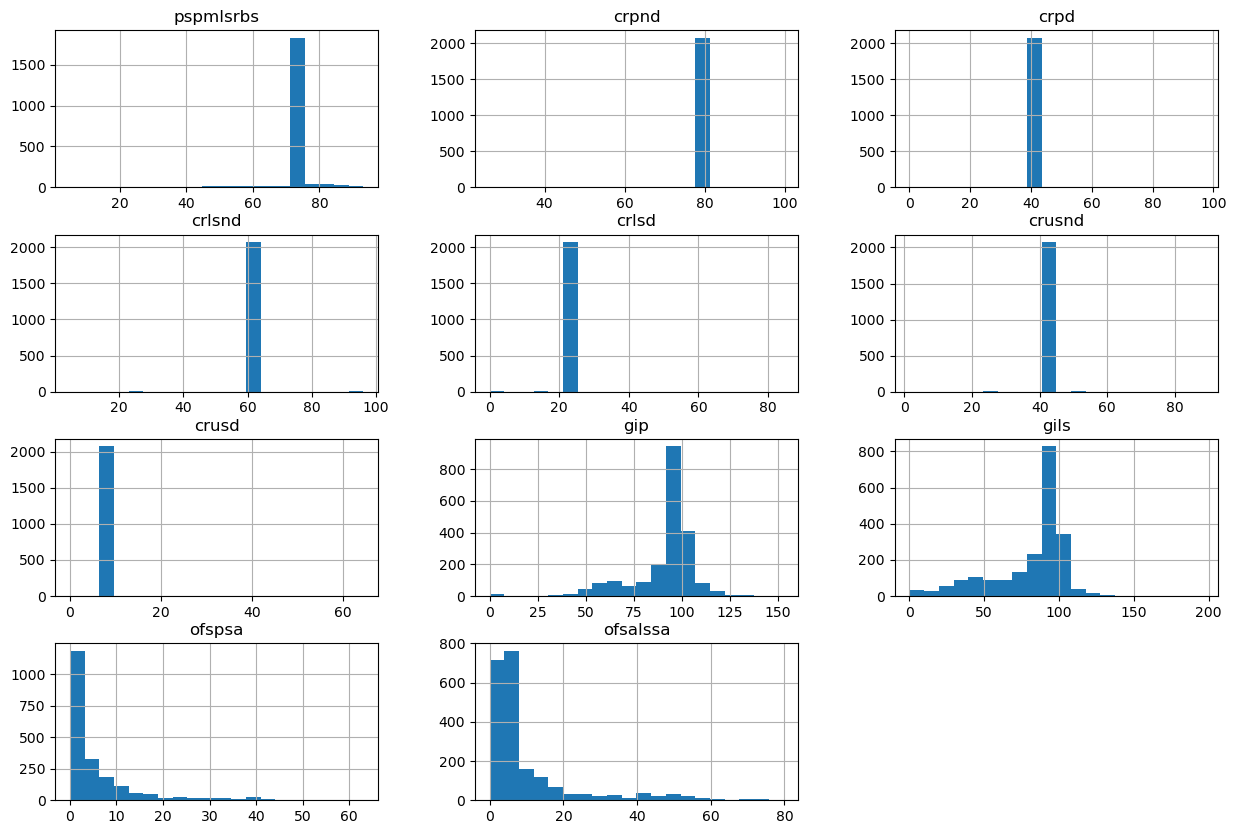

In [25]:
#create histogram plots to see the distribution of different numerical variables
columns= ['pspmlsrbs', 'crpnd', 'crpd', 'crlsnd', 'crlsd', 'crusnd', 'crusd',
       'gip', 'gils', 'ofspsa', 'ofsalssa',]


Cleaned_data[columns].hist( bins=20, figsize=(15,10))
plt.savefig('charts_1.png');

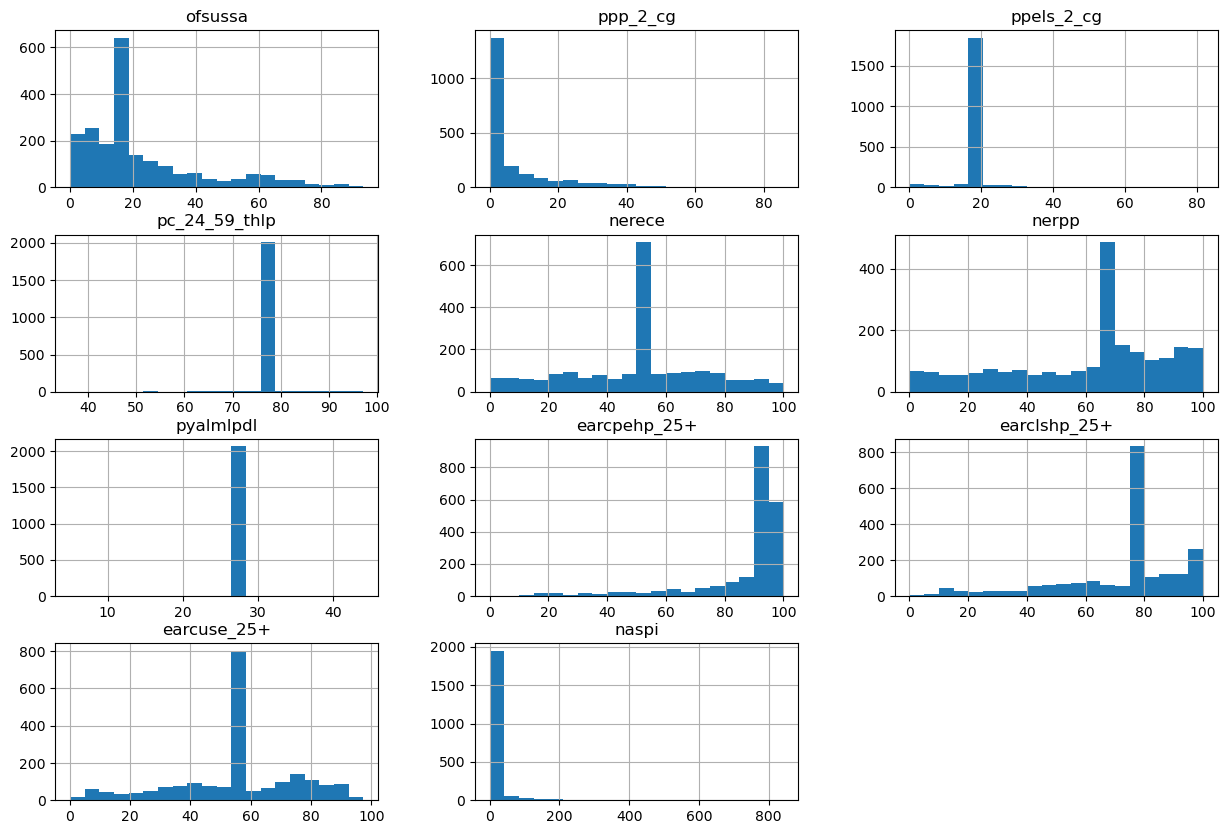

In [26]:
#create histogram plots to see the distribution of different numerical variables
columns= ['ofsussa', 'ppp_2_cg',
       'ppels_2_cg', 'pc_24_59_thlp', 'nerece', 'nerpp', 'pyalmlpdl',
       'earcpehp_25+', 'earclshp_25+', 'earcuse_25+', 'naspi']


Cleaned_data[columns].hist( bins=20, figsize=(15,10))
plt.savefig('charts_1.png');

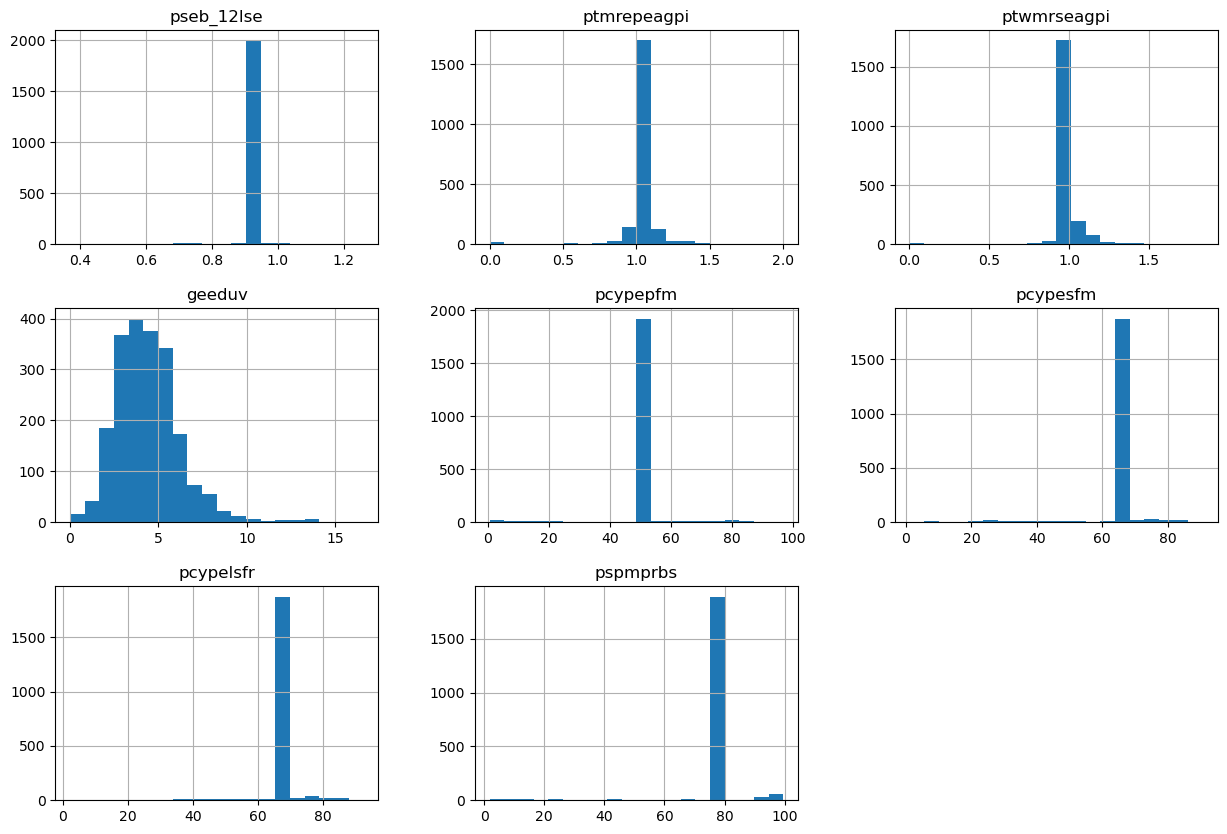

In [27]:


#create histogram plots to see the distribution of different numerical variables
columns= ['pseb_12lse',
       'ptmrepeagpi', 'ptwmrseagpi', 'geeduv', 'pcypepfm', 'pcypesfm',
       'pcypelsfr', 'pspmprbs']


Cleaned_data[columns].hist( bins=20, figsize=(15,10))
plt.savefig('charts_1.png');

- From the distribution plots of the numerical features above, it is obvious that most of the variables are not normally distributed as most are either left skewed or rigt skewed, Hence, we will subsequnetly normalize the data in order to have a well processed data for our machine learning model.
- Also the explanations for the impact of the distribution of each varible will be explained as we further on in the exploration phase of the work.

## Bivariate Analysis

#### Question(How do some variables relate with the Completion rate of  primary education students who are not disabled)

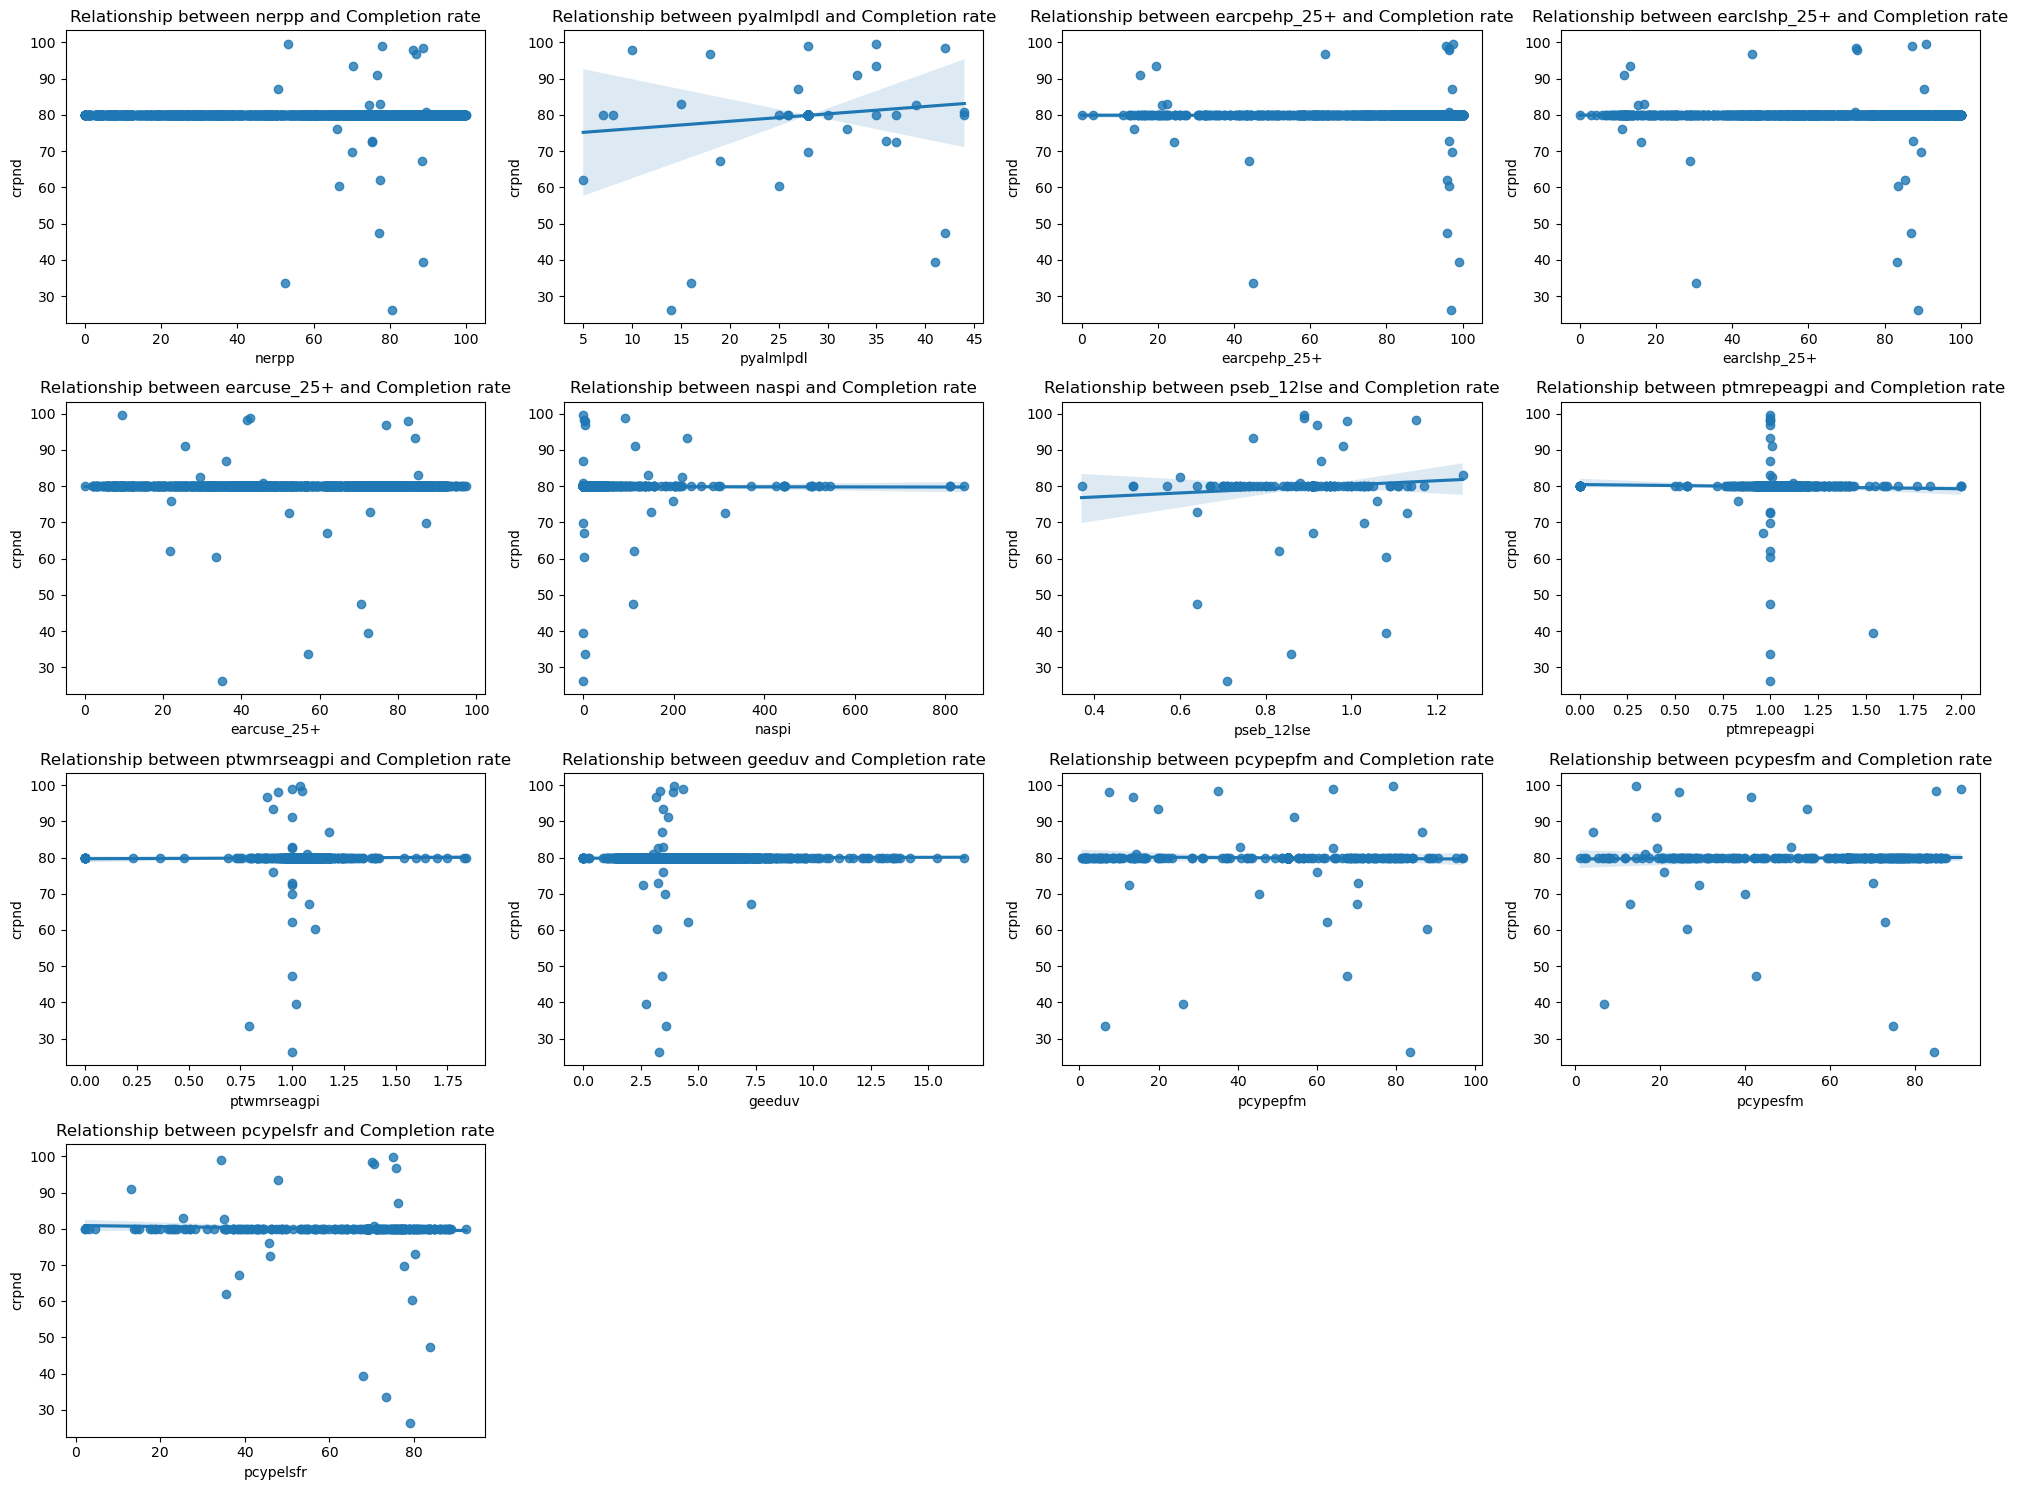

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the figure size is large enough to accommodate all subplots
plt.rcParams["figure.figsize"] = (20, 15)

# Define the list of categories to plot against 'CRPND'
categories = ['nerpp', 'pyalmlpdl',
       'earcpehp_25+', 'earclshp_25+', 'earcuse_25+', 'naspi', 'pseb_12lse',
       'ptmrepeagpi', 'ptwmrseagpi', 'geeduv', 'pcypepfm', 'pcypesfm',
       'pcypelsfr']

# Create a subplot for each category
for idx, x in enumerate(categories):
    plt.subplot(4, 4, idx + 1)
    sns.regplot(data=Cleaned_data, x=x, y='crpnd')
    plt.title(f'Relationship between {x} and Completion rate')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show();


- From the bivariate regression plots above, we intend showing how each variables relate with the completion rate. It is obvious that most of the variables do not have a linear relationship with the Completion rate of primary education students who are not disabled. Hence depicting that they many not be good predictors of school completion rate, however, we will apply some feature selection methods to still check and explore further on which of them to retain or remove

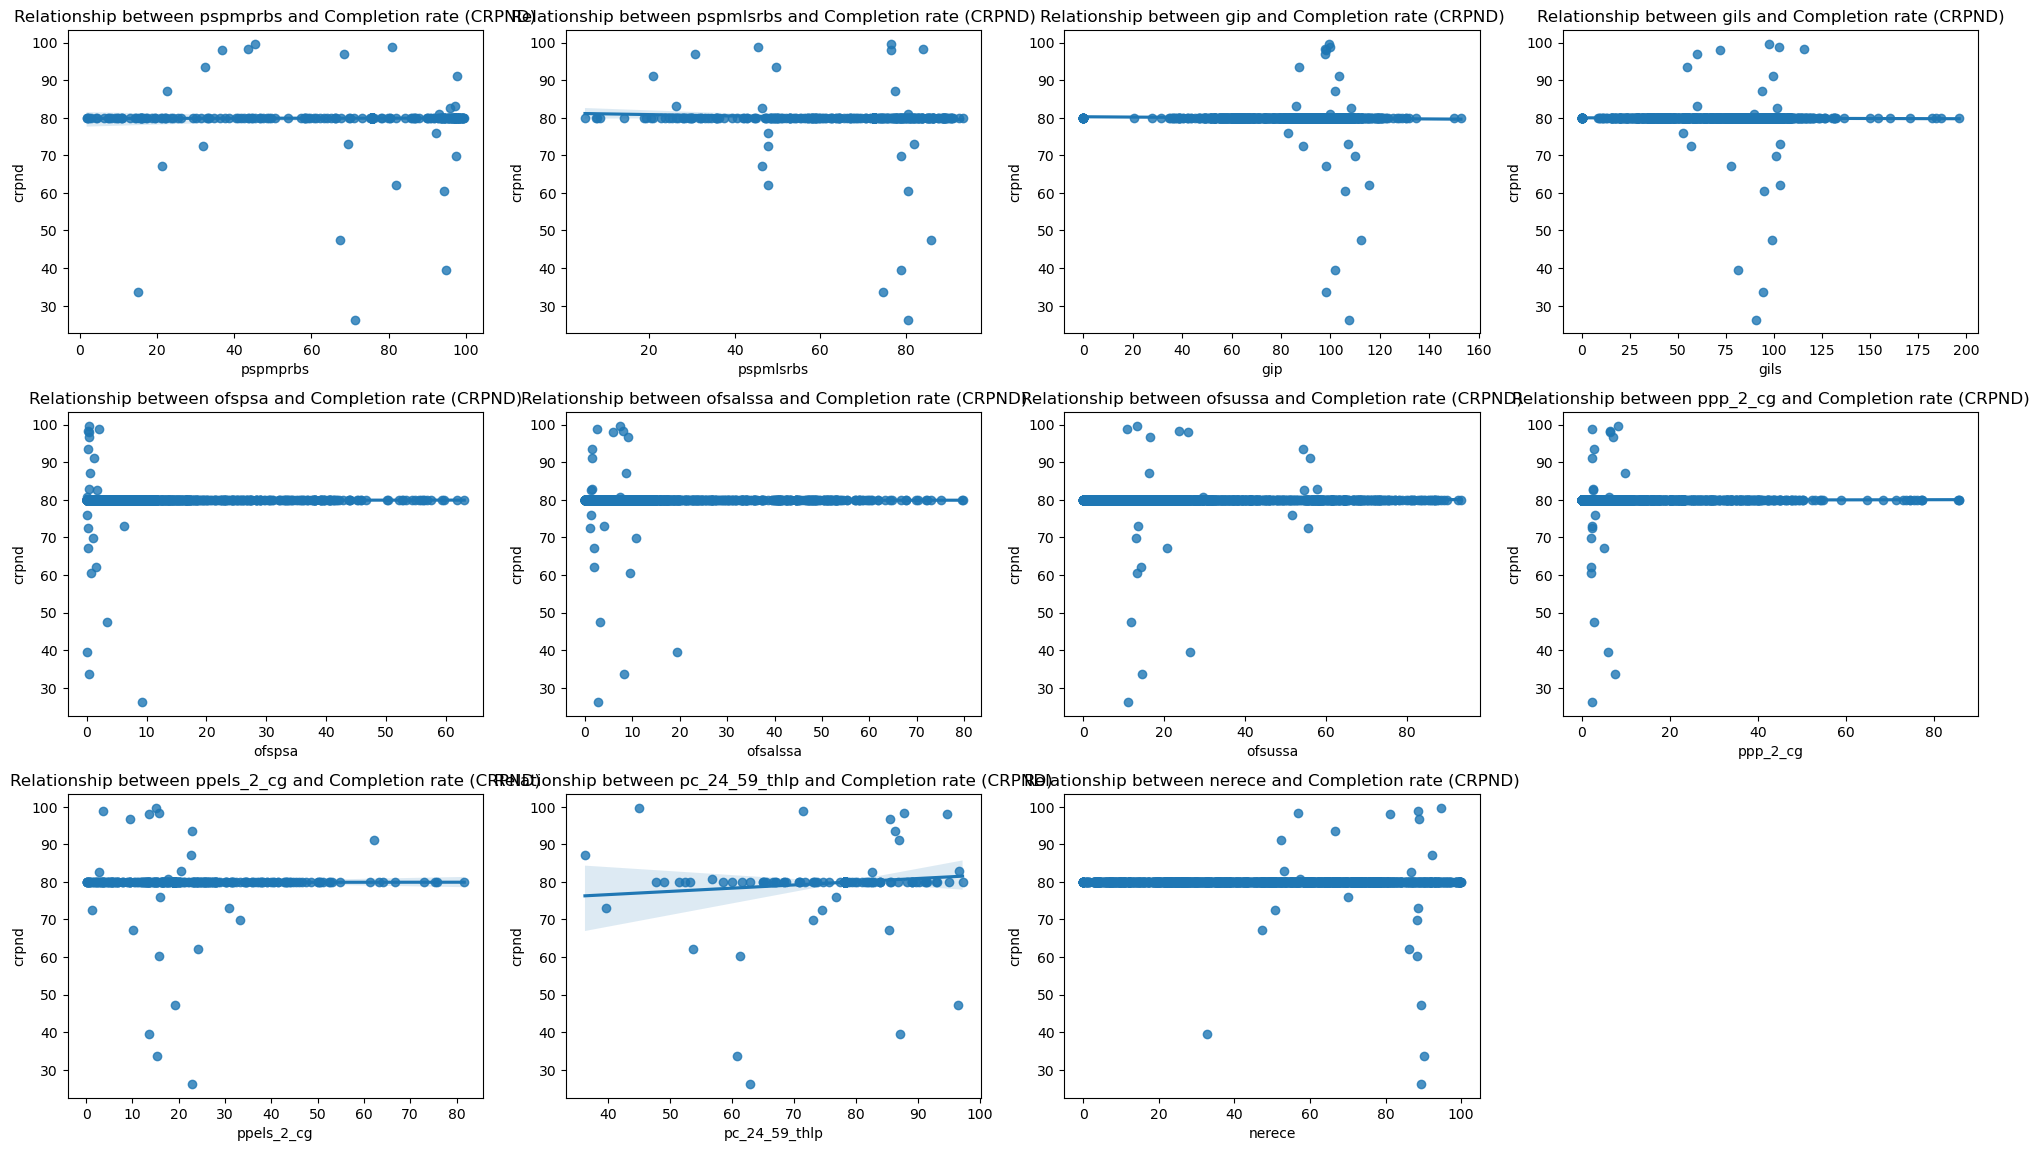

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the figure size is large enough to accommodate all subplots
plt.rcParams["figure.figsize"] = (20, 15)

# Define the list of categories to plot against 'CRPND'
categories = ['pspmprbs', 'pspmlsrbs',  'gip', 'gils', 'ofspsa', 'ofsalssa', 'ofsussa', 'ppp_2_cg',
       'ppels_2_cg', 'pc_24_59_thlp', 'nerece']

# Create a subplot for each category
for idx, x in enumerate(categories):
    plt.subplot(4, 4, idx + 1)
    sns.regplot(data=Cleaned_data, x=x, y='crpnd')
    plt.title(f'Relationship between {x} and Completion rate (CRPND)')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show();


- From the bivariate regression plots above, we intend showing how each variables relate with the completion rate. It is obvious that most of the variables do not have a linear relationship with the Completion rate of primary education students who are not disabled. Hence depicting that they many not be good predictors of school completion rate, however, we will apply some feature selection methods to still check and explore further on which of them to retain or remove

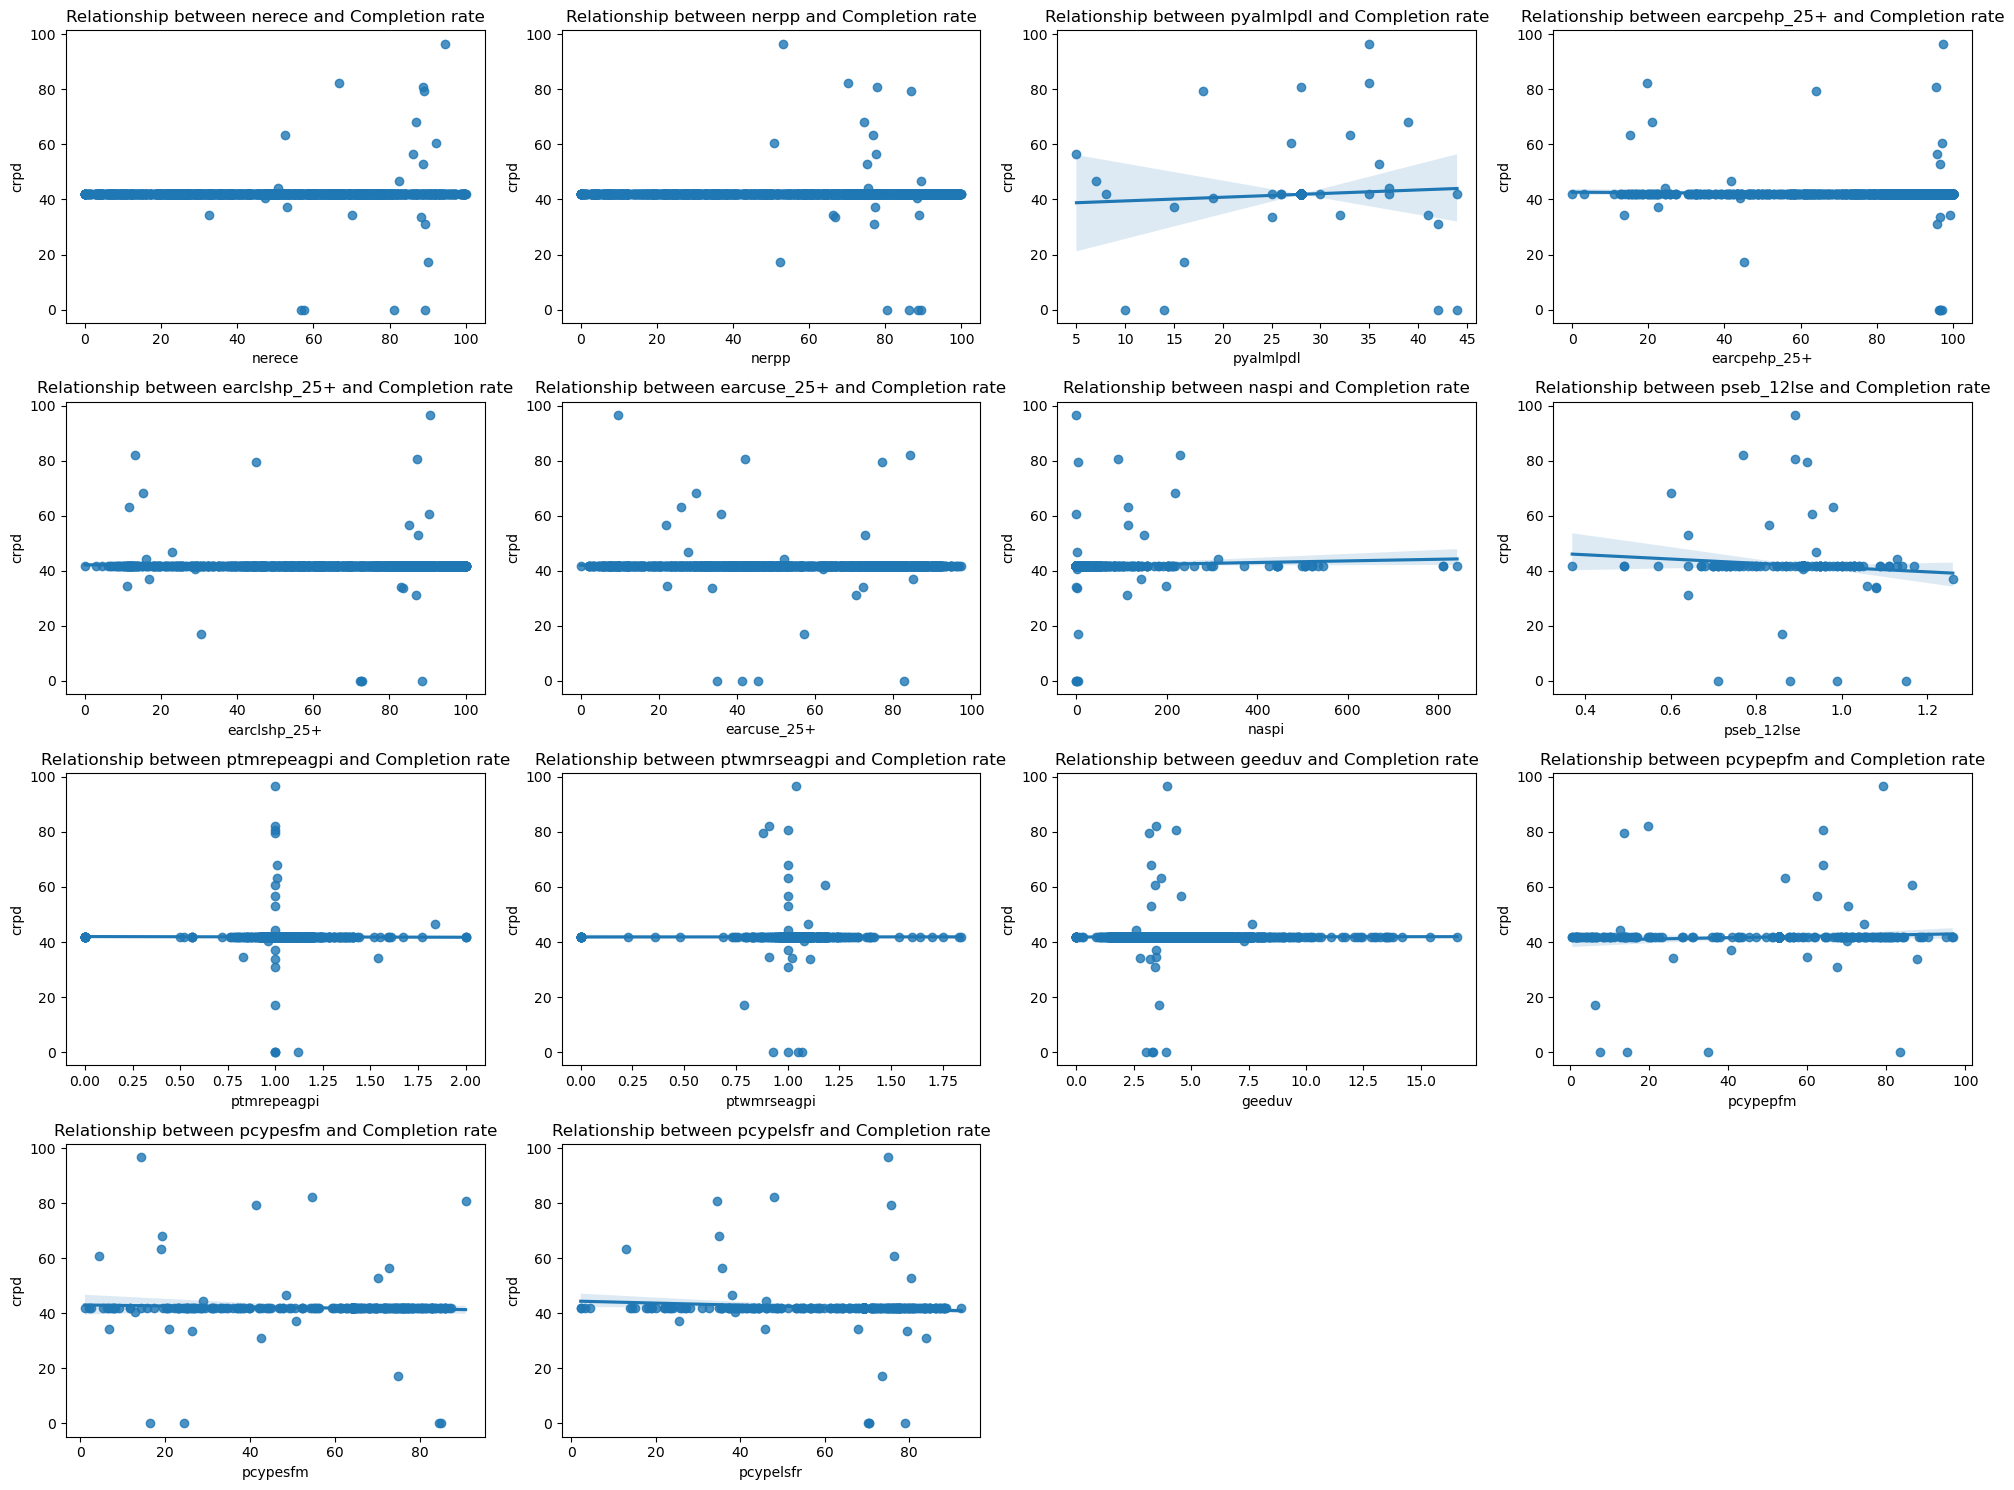

In [30]:


# Ensure the figure size is large enough to accommodate all subplots
plt.rcParams["figure.figsize"] = (20, 15)

# Define the list of categories to plot against 'CRPND'
categories = ['nerece', 'nerpp', 'pyalmlpdl',
       'earcpehp_25+', 'earclshp_25+', 'earcuse_25+', 'naspi', 'pseb_12lse',
       'ptmrepeagpi', 'ptwmrseagpi', 'geeduv', 'pcypepfm', 'pcypesfm',
       'pcypelsfr']

# Create a subplot for each category
for idx, x in enumerate(categories):
    plt.subplot(4, 4, idx + 1)
    sns.regplot(data=Cleaned_data, x=x, y='crpd')
    plt.title(f'Relationship between {x} and Completion rate')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show();


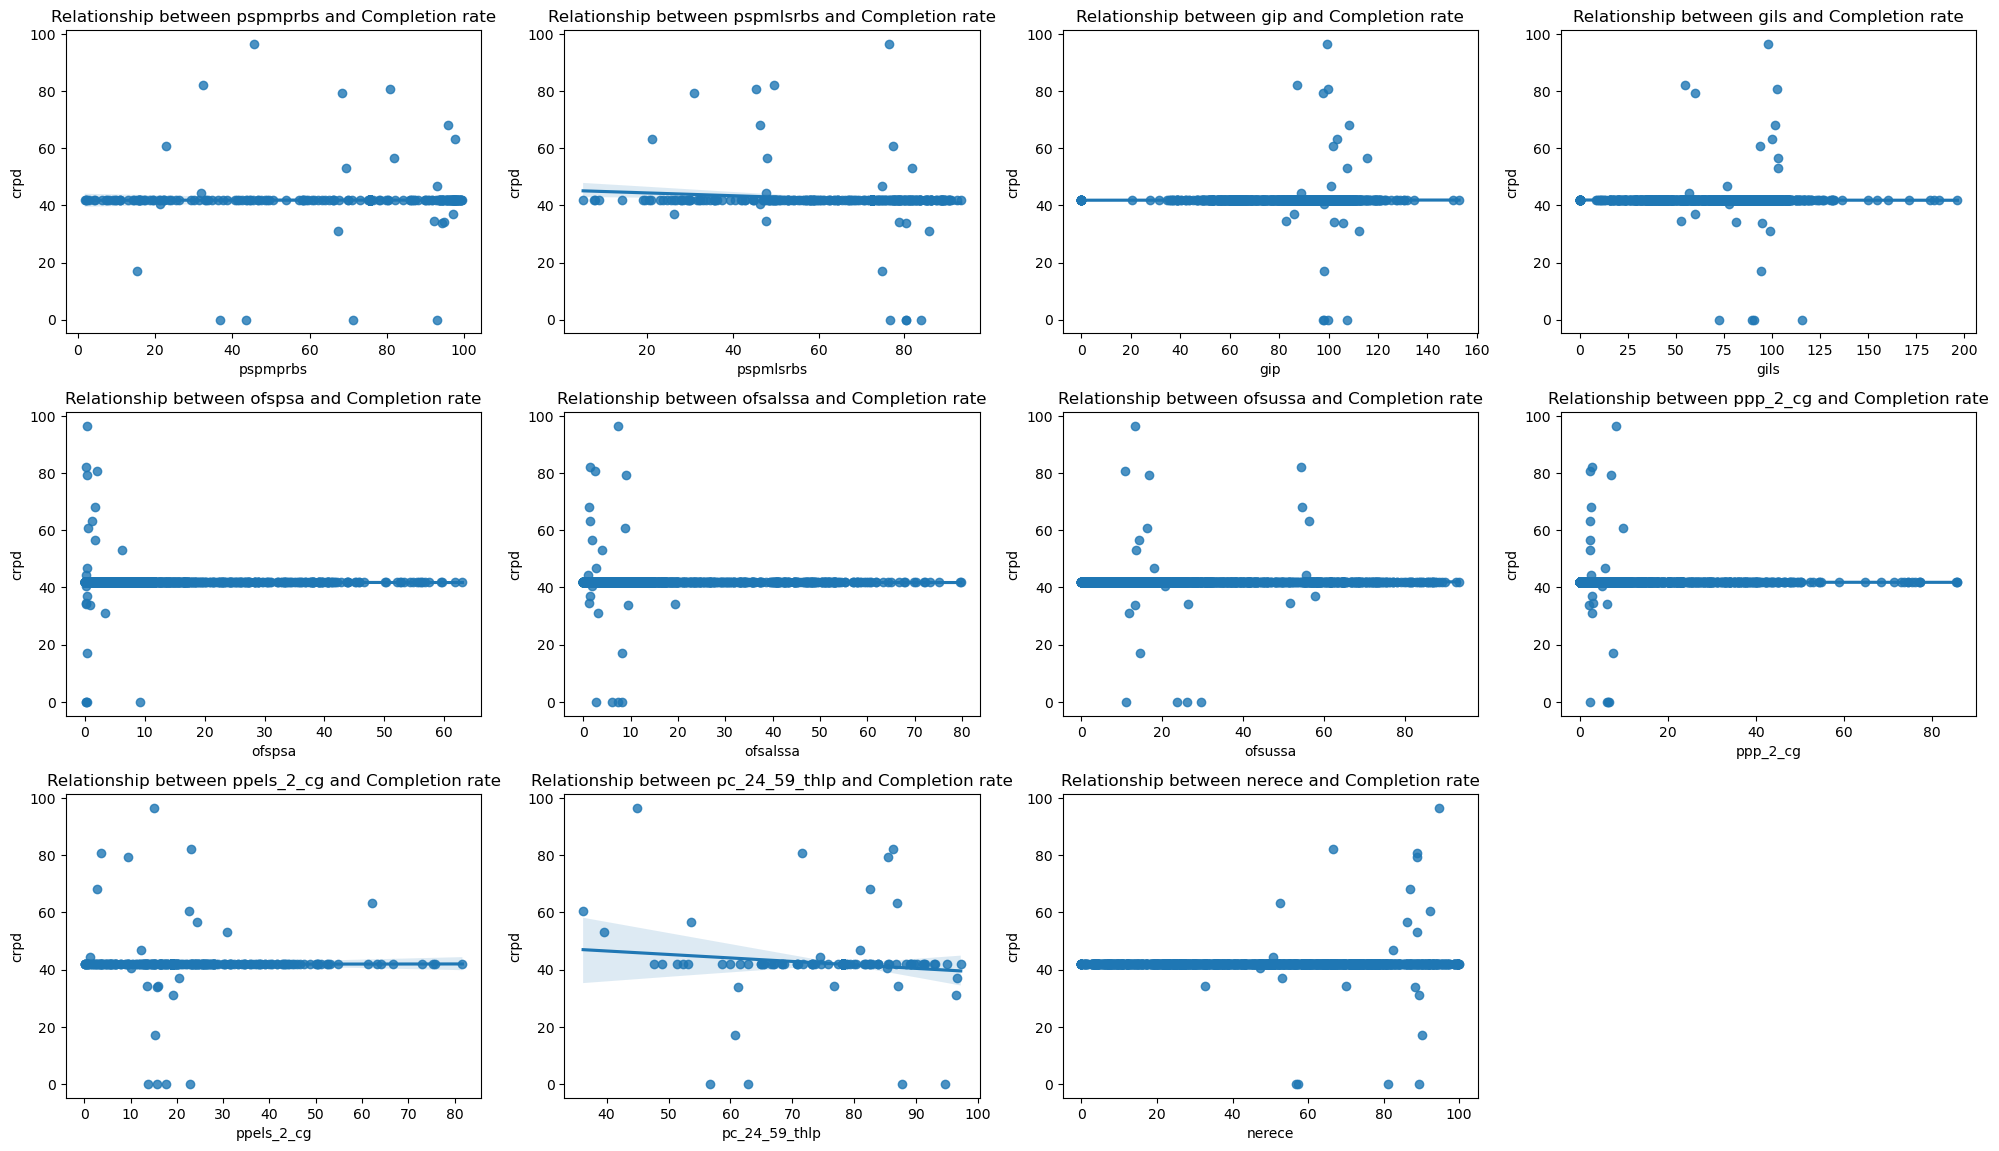

In [31]:


# Ensure the figure size is large enough to accommodate all subplots
plt.rcParams["figure.figsize"] = (20, 15)

# Define the list of categories to plot against 'CRPND'
categories = ['pspmprbs', 'pspmlsrbs',  'gip', 'gils', 'ofspsa', 'ofsalssa', 'ofsussa', 'ppp_2_cg',
       'ppels_2_cg', 'pc_24_59_thlp', 'nerece',]

# Create a subplot for each category
for idx, x in enumerate(categories):
    plt.subplot(4, 4, idx + 1)
    sns.regplot(data=Cleaned_data, x=x, y='crpd')
    plt.title(f'Relationship between {x} and Completion rate')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show();


## Multivariate Analysis

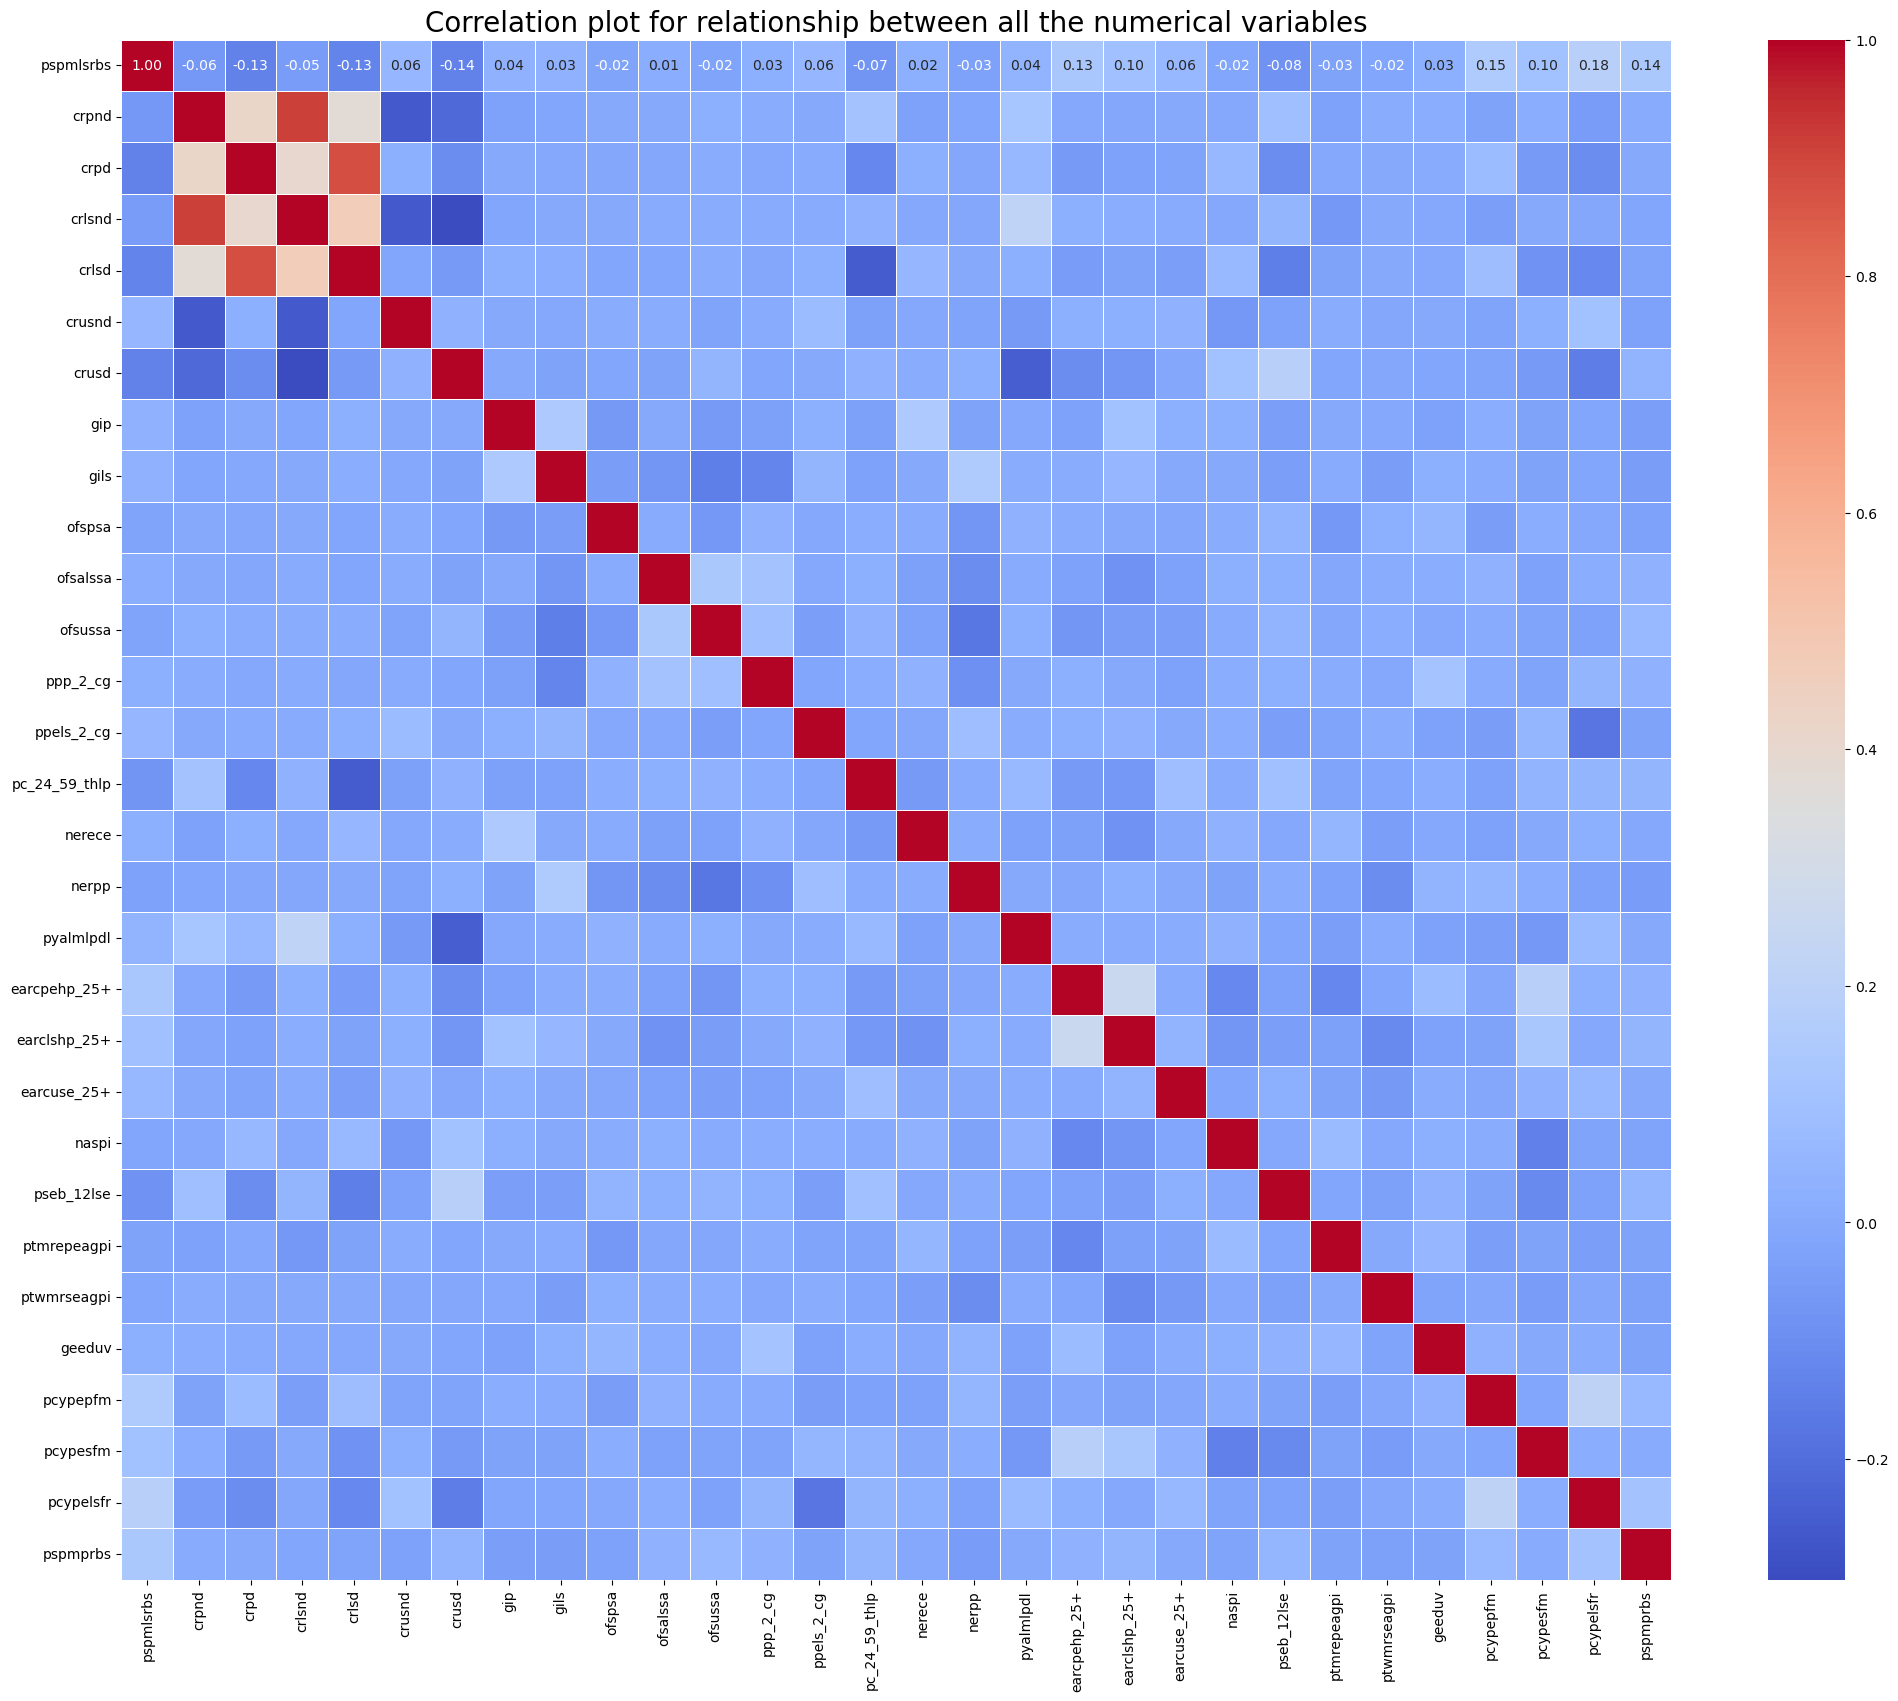

In [32]:
plt.figure(figsize=[25, 20])
sns.heatmap(data=Cleaned_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
# Show the plot
plt.title('Correlation plot for relationship between all the numerical variables', fontsize=20)
plt.show();

# Machine Learning Section
**Machine learninh models to consider**
- Elastic
- Random forest
- Xgboost
- gradient boosting
- MLP (non -linearity)


In [33]:
Cleaned_data.columns

Index(['pspmlsrbs', 'crpnd', 'crpd', 'crlsnd', 'crlsd', 'crusnd', 'crusd',
       'gip', 'gils', 'ofspsa', 'ofsalssa', 'ofsussa', 'ppp_2_cg',
       'ppels_2_cg', 'pc_24_59_thlp', 'nerece', 'nerpp', 'pyalmlpdl',
       'earcpehp_25+', 'earclshp_25+', 'earcuse_25+', 'naspi', 'pseb_12lse',
       'ptmrepeagpi', 'ptwmrseagpi', 'geeduv', 'pcypepfm', 'pcypesfm',
       'pcypelsfr', 'pspmprbs'],
      dtype='string')

In [34]:
y_columns = ['crpd', 'crpnd', 'crlsd', 'crlsnd', 'crusnd', 'crusd']
x = Cleaned_data.drop(columns=y_columns)
y = Cleaned_data[y_columns]

#### Split the data

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1674, 24)
x_test shape: (419, 24)
y_train shape: (1674, 6)
y_test shape: (419, 6)


#### Further splitting the data into cross validation sets

In [36]:
# Splitting the train set into train and cross validation, 70% of 80% for Train and 30% of 80% for cross validation.
#x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.31, random_state=40)

#print("x_train shape:", x_train.shape)
#print("x_cv shape:", x_cv.shape)
#print("y_train shape:", y_train.shape)
#print("y_cv shape:", y_cv.shape)

#### Feature selection using the "Variance Inflation Factor (VIF)" method.


In [37]:
# Utility function to return the VIF value for each feature provided
#from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(x, Cleaned_data):
    """
    Returns a DataFrame containing features and their corresponding variance inflation factor
    features: list of features whoes multicollinearity check is needed
    df: DataFrame of the data under review
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    import pandas as pd
    X = Cleaned_data[x]
    X['intercept'] = 1
    # Create dataframe to store vif values
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['Vif Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Feature']!='intercept'].sort_values('Vif Factor', ascending=False)
    return vif


def select_features(train_df, threshold):

    """Returns two objects;
    1. a DataFrame containing features and their corresponding variance inflation factor, and
    2. Pandas Index object containing the list of features that have the least Multicollinearity in accordance with
        the supplied threshold.
    train_df: The training dataset whoes Multicollinearity is to be checked
    threshold: value to compare VIF value with, above which, the feature droped
    """
    data = train_df.copy()
    flag = True
    while flag:
        features_to_consider = data.columns
        # Calling the "compute_vif" utility function the Variance Inflation Factor dataframe
        sorted_vif_df = (compute_vif(features_to_consider, data).reset_index().drop('index', axis=1))

        # Get the highest vif value to compare against a threshold
        highest_vif = sorted_vif_df.at[0, 'Vif Factor']

        # Compare the highest_vif with a threshold (5 was decided for this problem by the team)
        if highest_vif > threshold: # or highest_vif=='inf':
            # Select the feature corresponding to the highest_vif (index 0 for both)
            feature = sorted_vif_df.at[0, 'Feature']
            # Drop the feature
            data.drop(feature, axis=1, inplace=True)

        else:
            flag = False
    return sorted_vif_df, data.columns

In [38]:

threshold = 5
vif_df, features = select_features(x_train, threshold)

####  display the VIF dataframe and the selected features

In [39]:
display(vif_df)
print(features)

,Feature,Vif Factor
0,pcypelsfr,1.171428
1,earcpehp_25+,1.148651
2,pspmlsrbs,1.139286
3,earclshp_25+,1.134501
4,pcypesfm,1.119235
5,pcypepfm,1.114289
6,nerpp,1.097232
7,gils,1.094586
8,ofsussa,1.089311
9,gip,1.079891


Index(['pspmlsrbs', 'gip', 'gils', 'ofspsa', 'ofsalssa', 'ofsussa', 'ppp_2_cg',
       'ppels_2_cg', 'pc_24_59_thlp', 'nerece', 'nerpp', 'pyalmlpdl',
       'earcpehp_25+', 'earclshp_25+', 'earcuse_25+', 'naspi', 'pseb_12lse',
       'ptmrepeagpi', 'ptwmrseagpi', 'geeduv', 'pcypepfm', 'pcypesfm',
       'pcypelsfr', 'pspmprbs'],
      dtype='string')


#### Making a dataframe with the selected features

In [40]:
# make a dataframe of the selected features
X_train = x_train[features]
X_train.head()

,pspmlsrbs,gip,gils,ofspsa,ofsalssa,ofsussa,ppp_2_cg,ppels_2_cg,pc_24_59_thlp,nerece,...,earcuse_25+,naspi,pseb_12lse,ptmrepeagpi,ptwmrseagpi,geeduv,pcypepfm,pcypesfm,pcypelsfr,pspmprbs
1549,72.53,85.590,94.94,0.01,24.560,4.73,22.63,18.87,78.19,50.61,...,56.45,2.0,0.91,1.00,1.0,4.61,52.73,64.31,69.24,75.57
1457,72.53,95.440,83.19,3.33,48.940,27.44,0.20,18.87,78.19,38.42,...,56.45,2.0,0.91,1.00,1.0,7.33,52.73,64.31,69.24,75.57
554,72.53,92.850,71.67,4.23,0.130,7.09,11.39,18.87,78.19,66.31,...,49.15,183.0,0.91,1.10,1.0,7.07,52.73,64.31,69.24,75.57
2081,72.53,96.345,88.98,3.12,4.875,18.03,2.50,18.87,78.19,50.61,...,56.45,2.0,0.91,1.00,1.0,3.95,52.73,64.31,69.24,75.57
151,77.83,104.470,63.68,4.31,44.620,34.88,1.35,0.24,78.19,69.09,...,26.72,4.0,0.91,1.15,1.0,2.45,68.47,71.40,83.39,94.18


#### Normalization and standardization

In [41]:
# Normalizing and Standardizing the train data.
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
stand_scaler = StandardScaler()
#min_max_norm_data = min_max_scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(stand_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(stand_scaler.transform(x_test[features]), columns=X_train.columns, index=x_test.index)

In [42]:
print(X_train_scaled[:3])

      pspmlsrbs       gip      gils    ofspsa  ofsalssa   ofsussa  ppp_2_cg  \
1549   0.130067 -0.318244  0.583895 -0.684241  1.116791 -0.966549  1.306845   
1457   0.130067  0.263335  0.126356 -0.332861  2.950048  0.224018 -0.633343   
554    0.130067  0.110413 -0.322227 -0.237608 -0.720225 -0.842826  0.334589   

      ppels_2_cg  pc_24_59_thlp    nerece  ...  earcuse_25+     naspi  \
1549   -0.046311       0.054014  0.040443  ...     0.045627 -0.207758   
1457   -0.046311       0.054014 -0.498585  ...     0.045627 -0.207758   
554    -0.046311       0.054014  0.734679  ...    -0.311117  2.746084   

      pseb_12lse  ptmrepeagpi  ptwmrseagpi    geeduv  pcypepfm  pcypesfm  \
1549    0.035561    -0.119748    -0.064353  0.101334  0.056268  0.129167   
1457    0.035561    -0.119748    -0.064353  1.550741  0.056268  0.129167   
554     0.035561     0.674773    -0.064353  1.412195  0.056268  0.129167   

      pcypelsfr  pspmprbs  
1549   0.123184  0.090827  
1457   0.123184  0.090827  
5

In [43]:
print(X_test_scaled[:3])

      pspmlsrbs       gip      gils    ofspsa  ofsalssa   ofsussa  ppp_2_cg  \
1404   0.130067  2.240115  0.662163 -0.153996 -0.307404  1.305017 -0.614313   
1723   0.130067  0.625273 -1.357628 -0.683183 -0.363424 -0.269299 -0.434394   
1230   0.130067  0.105099  0.015768 -0.576287 -0.540509 -0.945055 -0.303779   

      ppels_2_cg  pc_24_59_thlp    nerece  ...  earcuse_25+     naspi  \
1404   -0.046311       0.054014  0.561341  ...     0.045627 -0.207758   
1723   -0.046311       0.054014  0.040443  ...     0.045627 -0.207758   
1230   -0.046311       0.054014  1.241427  ...    -0.113686 -0.207758   

      pseb_12lse  ptmrepeagpi  ptwmrseagpi    geeduv  pcypepfm  pcypesfm  \
1404    0.035561    -0.119748    -0.064353 -0.495480  0.056268  0.129167   
1723    0.035561    -0.119748    -0.064353 -0.426207  0.056268  0.129167   
1230    0.035561    -0.119748    -0.064353 -0.292989  0.056268  0.129167   

      pcypelsfr  pspmprbs  
1404   0.123184  0.090827  
1723   0.123184  0.090827  
1

#### Modeling

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x: cross validation features dataset
    y: cross validation target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    rmse = mean_squared_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('RMSE: {:.2f}'.format(rmse))
    print()

#### Modeling with Different Base Regressors

In [45]:
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dictionary of base regressors
base_regressors_dict = {
    'Elastic net': ElasticNet(),
    'RF Regressor': RandomForestRegressor(random_state=0),
    'xgboost': XGBRegressor(),
    'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'MLP': MLPRegressor()
}

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
    mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")

# Wrapping and evaluating each model with MultiOutputRegressor
for key, model in base_regressors_dict.items():
    multi_output_model = MultiOutputRegressor(model)
    multi_output_model.fit(X_train_scaled, y_train)
    print(f'Performance of "{key}" on Test set:')
    print('==' * 28)
    print('Test set:')
    print("**" * 8)
    evaluate_model(multi_output_model, X_test_scaled, y_test)
    print('\n')


MultiOutputRegressor(estimator=ElasticNet())

Performance of "Elastic net" on Test set:
Test set:
****************
MSE: [12.23968919  5.58941058 10.81415035  8.98656609  9.07000619  3.48759572]
MAE: [0.36858173 0.32357727 0.39810011 0.38899657 0.34757865 0.22691069]




MultiOutputRegressor(estimator=RandomForestRegressor(random_state=0))

Performance of "RF Regressor" on Test set:
Test set:
****************
MSE: [ 9.50350225  5.1673575  10.12825218 11.30298604 13.07758485  4.57263301]
MAE: [0.34721169 0.2765358  0.38898305 0.38842983 0.42748902 0.23381909]




MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

Performance of "xgboost" on Test set:
Test set:
****************
MSE: [10.02223152  2.55445455  6.79250246  7.24480749 21.11577838  2.34130302]
MAE: [0.30460373 0.1746289  0.28566412 0.32341773 0.52840365 0.14541348]




MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=0))

Performance of "Gradient Boost" on Test set:
Test set:
****************
MSE: [ 8.34303591  5.05452856  8.7743857  13.22409985 11.68200988  3.27786443]
MAE: [0.32538497 0.25941458 0.32169066 0.38590354 0.43312938 0.19400334]




MultiOutputRegressor(estimator=MLPRegressor())

Performance of "MLP" on Test set:
Test set:
****************
MSE: [ 39.64204762 103.57167428  17.66323942  58.15365196  26.62533109
   3.07356952]
MAE: [3.60247376 7.34755972 1.65730231 5.33119191 3.23121955 0.5612778 ]




##### Models Result
- The Gradient Boosting Regressor has the lowest MSE and MAE values overall, indicating better performance compared to the other models.
- The Random Forest Regressor also shows competitive performance.
- **Conclusion**
- Based on the performance metrics (MSE and MAE), the Gradient Boosting Regressor is the best model among the MultiOutputRegressor estimators evaluated. It exhibits the lowest MSE and MAE values across most target variables, indicating better predictive capability. Therefore, the Gradient Boosting Regressor should be chosen as the best MultiOutputRegressor model for this task.

#### Retraining the best model ()

In [46]:
# Define the base model
base_model = GradientBoostingRegressor(random_state=0)

# Create MultiOutputRegressor with the base model
multi_output_model = MultiOutputRegressor(base_model)

# Fit the MultiOutputRegressor model
multi_output_model.fit(X_train_scaled, y_train)

# Evaluate the model
print('Performance of Gradient Boost on Test set:')
print('==' * 28)
print('Test set:')
print("**" * 8)
evaluate_model(multi_output_model, X_test_scaled, y_test)
print('\n')


MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=0))

Performance of Gradient Boost on Test set:
Test set:
****************
MSE: [ 8.34303591  5.05452856  8.7743857  13.22409985 11.68200988  3.27786443]
MAE: [0.32538497 0.25941458 0.32169066 0.38590354 0.43312938 0.19400334]




#### Obtaining The Feature Importance

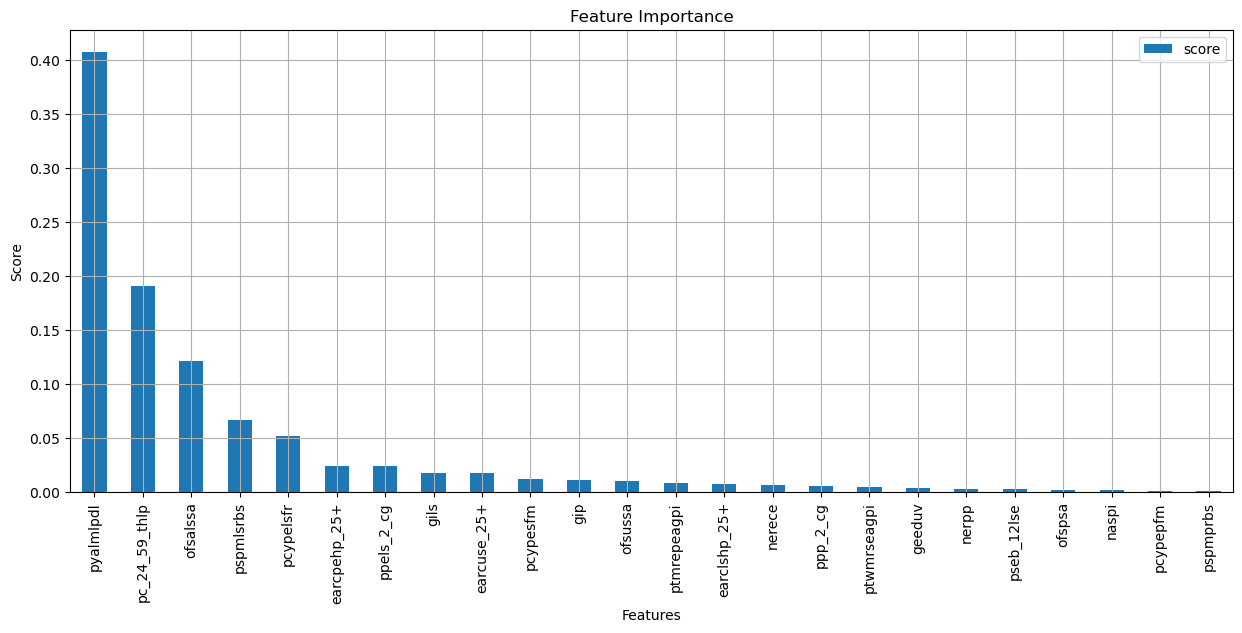

In [47]:
# Get feature importance from the first base estimator
feature_importance = multi_output_model.estimators_[0].feature_importances_

# Create a dataframe with feature importance
data = pd.DataFrame(data=feature_importance, index=X_train.columns, columns=["score"])

# Sort the dataframe by score in descending order
data = data.sort_values(by="score", ascending=False)

# Plot the feature importance
data.plot(kind='bar', figsize=(15,6), title='Feature Importance')
plt.xlabel('Features')
plt.ylabel('Score')
plt.grid()
plt.show();


#### Make a Dataframe with the most important features

In [48]:
Cleaned_data.columns

Index(['pspmlsrbs', 'crpnd', 'crpd', 'crlsnd', 'crlsd', 'crusnd', 'crusd',
       'gip', 'gils', 'ofspsa', 'ofsalssa', 'ofsussa', 'ppp_2_cg',
       'ppels_2_cg', 'pc_24_59_thlp', 'nerece', 'nerpp', 'pyalmlpdl',
       'earcpehp_25+', 'earclshp_25+', 'earcuse_25+', 'naspi', 'pseb_12lse',
       'ptmrepeagpi', 'ptwmrseagpi', 'geeduv', 'pcypepfm', 'pcypesfm',
       'pcypelsfr', 'pspmprbs'],
      dtype='string')

In [49]:
most_important_features = X_train.drop([ 'ptwmrseagpi', 'ppels_2_cg','ofsussa','earcuse_25+','pseb_12lse',
                                        'naspi','earclshp_25+','pspmprbs','gils','ofspsa', 'pcypesfm'], axis=1).columns

new_X_train = X_train[most_important_features]
new_X_train.head()

,pspmlsrbs,gip,ofsalssa,ppp_2_cg,pc_24_59_thlp,nerece,nerpp,pyalmlpdl,earcpehp_25+,ptmrepeagpi,geeduv,pcypepfm,pcypelsfr
1549,72.53,85.590,24.560,22.63,78.19,50.61,10.620,28.0,93.00,1.00,4.61,52.73,69.24
1457,72.53,95.440,48.940,0.20,78.19,38.42,29.640,28.0,93.00,1.00,7.33,52.73,69.24
554,72.53,92.850,0.130,11.39,78.19,66.31,30.190,28.0,76.86,1.10,7.07,52.73,69.24
2081,72.53,96.345,4.875,2.50,78.19,50.61,66.155,28.0,93.00,1.00,3.95,52.73,69.24
151,77.83,104.470,44.620,1.35,78.19,69.09,97.920,28.0,82.64,1.15,2.45,68.47,83.39


In [50]:
new_X_train= new_X_train.rename(columns={'earcuse_25+':'earcuse_twnetyfive', 'earclshp_25+':'earclshp_twentyfive'})


In [51]:
scaler = StandardScaler()
new_X_train_scaled = pd.DataFrame(scaler.fit_transform(new_X_train), columns=new_X_train.columns, index=new_X_train.index)
new_X_test_scaled = pd.DataFrame(scaler.transform(x_test[most_important_features]),
                                 columns=new_X_train.columns, index=x_test.index)

#### Retrain the model with the new best features

In [52]:
# Define the base model
base_model = GradientBoostingRegressor(random_state=0)

# Create MultiOutputRegressor with the base model
multi_output_model = MultiOutputRegressor(base_model)

# Fit the MultiOutputRegressor model
multi_output_model.fit(new_X_train_scaled, y_train)

# Evaluate the model
print('Performance of Gradient Boost on Test set:')
print('==' * 28)
print('Test set:')
print("**" * 8)
evaluate_model(multi_output_model, new_X_test_scaled, y_test)
print('\n')


MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=0))

Performance of Gradient Boost on Test set:
Test set:
****************
MSE: [ 7.59439545  5.01663182  7.81295344  9.18651807 14.440191    3.34550608]
MAE: [0.29435861 0.2528487  0.29499228 0.33830164 0.46666998 0.16252451]




#### Comparison of predictions against actual

In [53]:
import pandas as pd

# Get predictions
y_pred = multi_output_model.predict(new_X_test_scaled)

# Create a DataFrame to compare the actual values with the predicted values
# Assuming y_test is a DataFrame with appropriate column names
y_test_df = pd.DataFrame(y_test, columns=['crpd', 'crpnd', 'crlsd', 'crlsnd', 'crusnd', 'crusd'])
y_pred_df = pd.DataFrame(y_pred, columns=['crpd_pred', 'crpnd_pred', 'crlsd_pred', 'crlsnd_pred', 'crusnd_pred', 'crusd_pred'])

# Concatenate the actual and predicted values for comparison
comparison_df = pd.concat([y_test_df.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)

# Display the comparison DataFrame
comparison_df.head(2)


,crpd,crpnd,crlsd,crlsnd,crusnd,crusd,crpd_pred,crpnd_pred,crlsd_pred,crlsnd_pred,crusnd_pred,crusd_pred
0,41.84,79.94,21.32,62.2,40.75,9.6,41.840264,79.939363,21.320342,62.20015,40.751022,9.614933
1,41.84,79.94,21.32,62.2,40.75,9.6,41.840264,79.939363,21.318315,62.20015,40.751022,9.599468


#### Visualize the performance on Test data

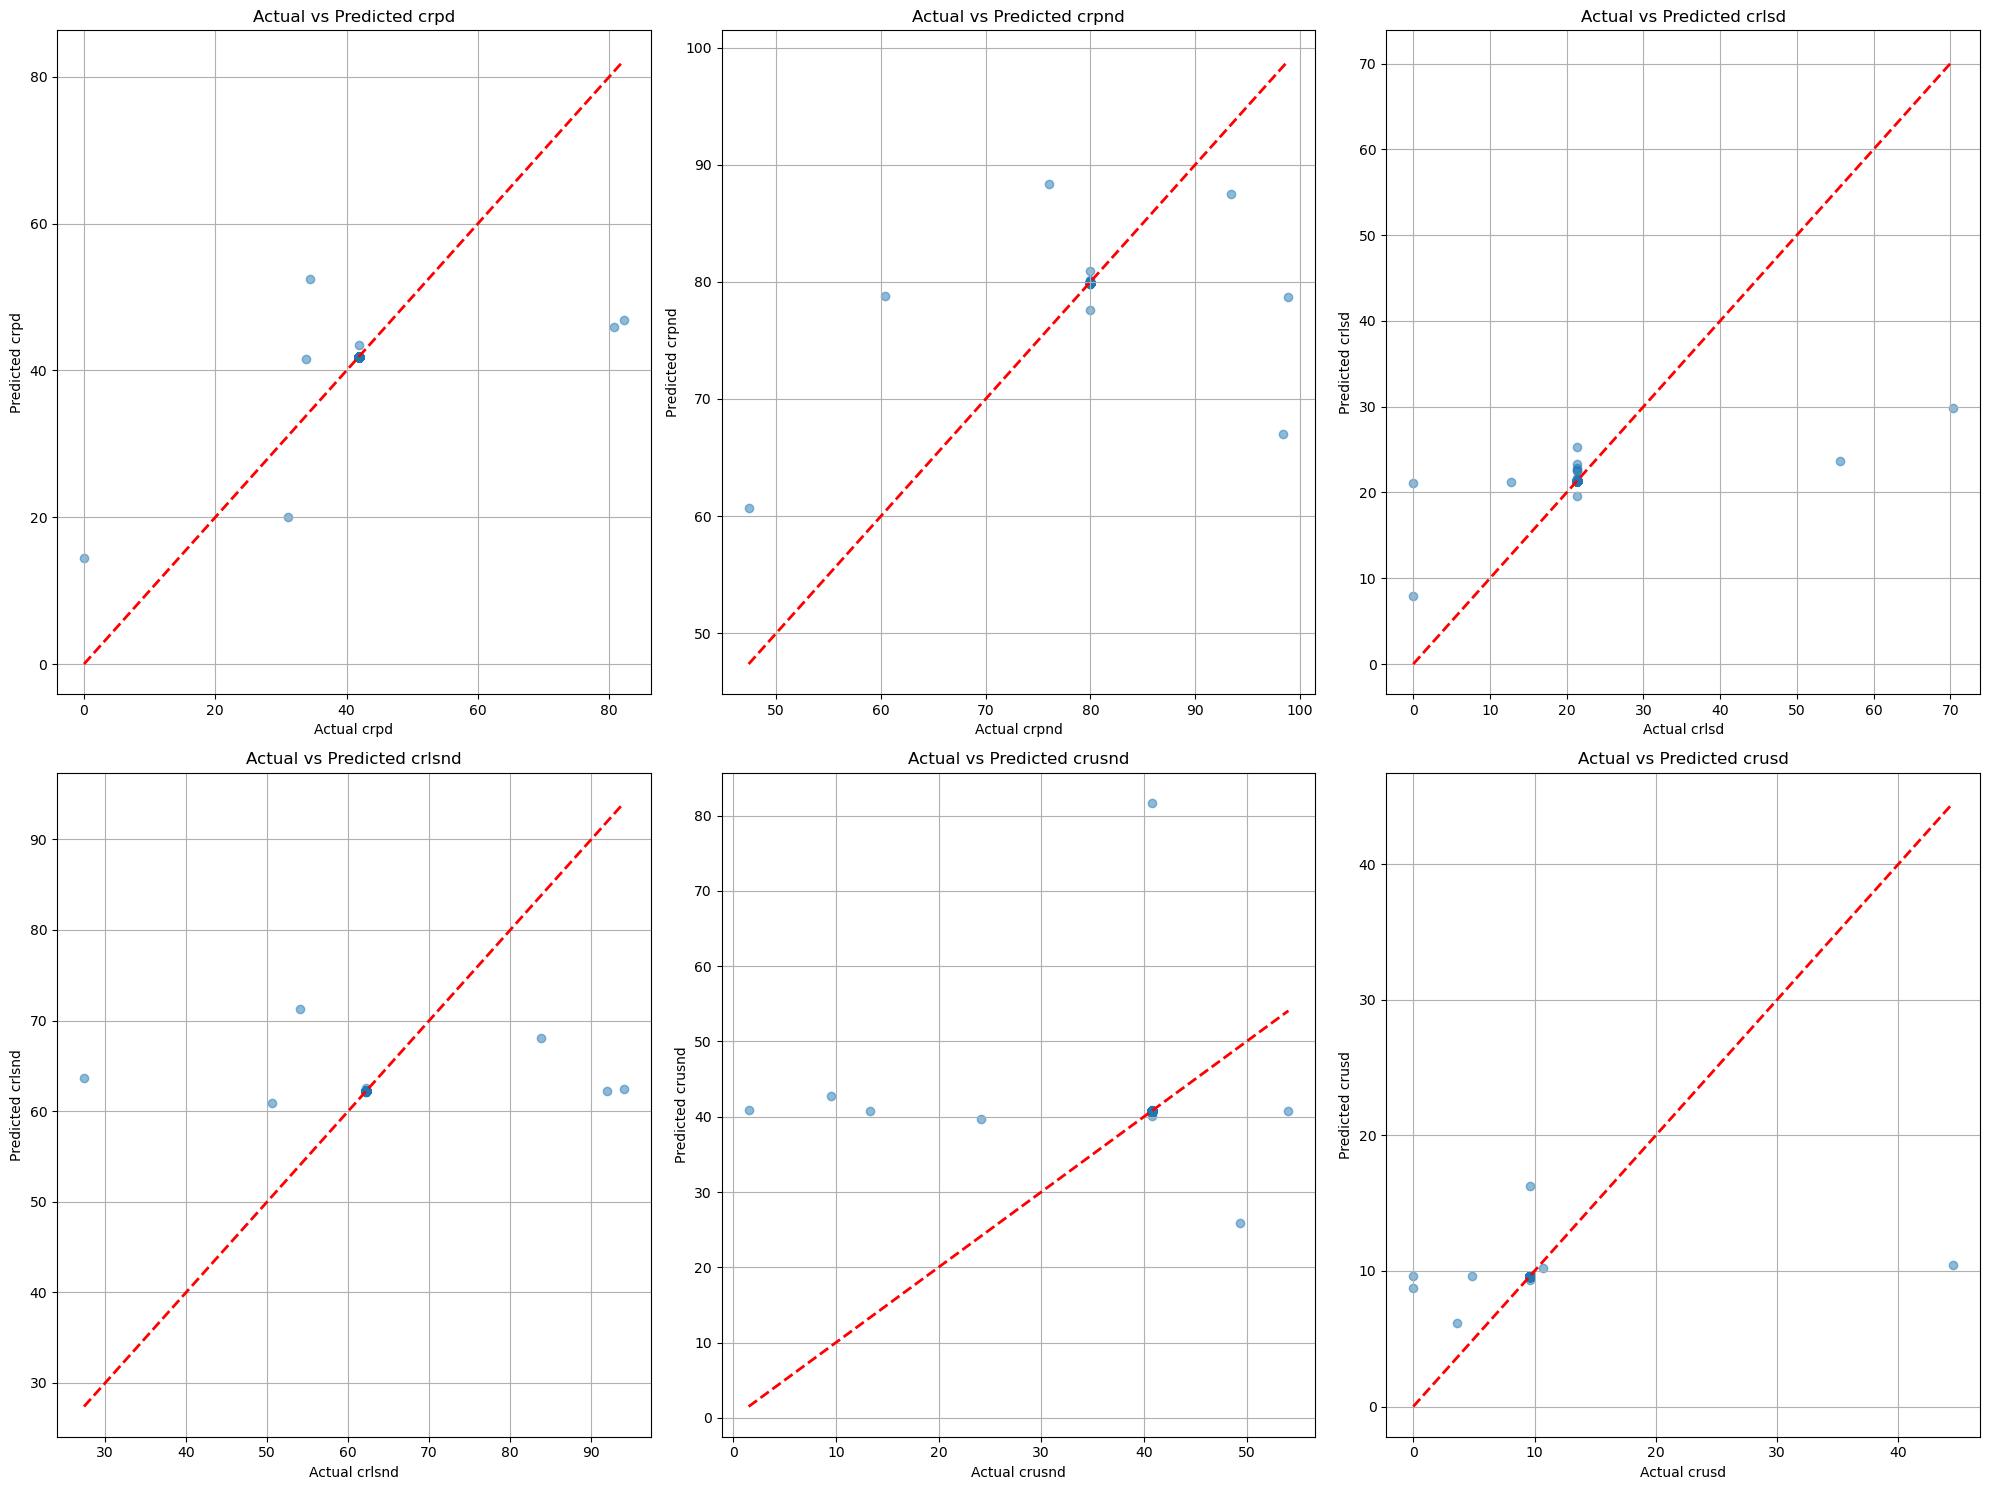

In [54]:
target_columns = ['crpd', 'crpnd', 'crlsd', 'crlsnd', 'crusnd', 'crusd']

plt.figure(figsize=(20, 15))

for i, column in enumerate(target_columns):
    plt.subplot(2, 3, i+1)
    plt.scatter(y_test_df[column], y_pred_df[f'{column}_pred'], alpha=0.5)
    plt.plot([y_test_df[column].min(), y_test_df[column].max()],
             [y_test_df[column].min(), y_test_df[column].max()], 'r--', lw=2)
    plt.xlabel(f'Actual {column}')
    plt.ylabel(f'Predicted {column}')
    plt.title(f'Actual vs Predicted {column}')
    plt.grid(True)

plt.tight_layout()
plt.show();

#### Model comparison using mean squared error and mean absolute error

In [56]:
#pip install PrettyTable 

Note: you may need to restart the kernel to use updated packages.


In [57]:


# Constructing the result summary
from prettytable import PrettyTable
task1_result = PrettyTable()
task1_result.field_names = ["Regressor",  "MAE_crpd", "MAE_crpnd", "MAE_crlsd", "MAE_crlsnd", "MAE_crusnd", "MAE_crusd"]
task1_result.add_row(['XGBR',  0.29911403, 0.24729523, 0.25878531, 0.37450027, 0.53036252 ,0.18669709])
task1_result.add_row(['GBR',  0.29435861, 0.2528487,  0.29499228, 0.33830164, 0.46666998, 0.16252451])
task1_result.add_row(['RFReg',0.34951169, 0.2705747,  0.38567613, 0.38904797, 0.41150095, 0.24455274])
task1_result.add_row(['MLPReg', 3.55129996, 7.55046495, 1.63934904 ,5.30806786, 3.31357662, 0.58508552])
task1_result.add_row(['ENReg', 0.36858173, 0.32357727, 0.39810011, 0.38899657, 0.34757865, 0.22691069])


print('Result Summary for All Regressors:')
print(task1_result)

Result Summary for All Regressors:
+-----------+------------+------------+------------+------------+------------+------------+
| Regressor |  MAE_crpd  | MAE_crpnd  | MAE_crlsd  | MAE_crlsnd | MAE_crusnd | MAE_crusd  |
+-----------+------------+------------+------------+------------+------------+------------+
|    XGBR   | 0.29911403 | 0.24729523 | 0.25878531 | 0.37450027 | 0.53036252 | 0.18669709 |
|    GBR    | 0.29435861 | 0.2528487  | 0.29499228 | 0.33830164 | 0.46666998 | 0.16252451 |
|   RFReg   | 0.34951169 | 0.2705747  | 0.38567613 | 0.38904797 | 0.41150095 | 0.24455274 |
|   MLPReg  | 3.55129996 | 7.55046495 | 1.63934904 | 5.30806786 | 3.31357662 | 0.58508552 |
|   ENReg   | 0.36858173 | 0.32357727 | 0.39810011 | 0.38899657 | 0.34757865 | 0.22691069 |
+-----------+------------+------------+------------+------------+------------+------------+


#### Save the model for testing and deployment

In [58]:
# Save the trained model to a file
import pickle as pkl
filename = 'predictor.sav'
with open(filename, 'wb') as file:
    pkl.dump(multi_output_model, file)

print(f'Model saved to {filename}')

Model saved to predictor.sav


#### Test Saved Model

In [59]:
# Load the model from disk for prediction.
import joblib
rainfall_model = joblib.load('predictor.sav')
input_data= (72.53,	85.590,	24.560,	22.63,	78.19,	50.61,
             10.620,	28.0,	93.00,	1.00,	4.61,	52.73,	69.24)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rainfall_model.predict(input_data_reshaped)

# Print the prediction
print('Prediction:', prediction);


Prediction: [[14.55290447 61.87504378 21.53710365 63.31105405 33.19501806  6.89450961]]
